In [1]:
#测试GPU可用性
import tensorflow as tf
print('GPU可用性:',tf.test.is_gpu_available())

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GPU可用性: True


In [2]:
#数据读取
import pandas as pd
feature_data=pd.read_csv("/kaggle/input/dna-methlylation-feature/feature_data.csv")

该阶段分析生物学年龄统计学特征

In [3]:
#生物学年龄预测特征重要性
Age_feature=['cg06782035','cg02650266','cg06784991','cg10630880','cg22851880','cg18667659','cg16290275',
             'cg10501210','cg07202479','cg11176990','cg12934382','cg23995914','cg17104258','cg25090514',
             'cg08453194','cg22454769','cg07553761','cg24079702','cg23606718','cg16867657','gender_encode','age']
Age_feature_data=feature_data.loc[:,Age_feature]
Age_feature_data.head(10)

cg06782035  cg02650266  cg06784991  cg10630880  cg22851880  cg18667659  \
0   -3.314031   -2.511081   -1.599394   -3.507691   -0.196592    0.480968   
1   -3.374769   -2.570129   -1.482415   -2.664729    0.216802    0.514987   
2   -3.439160   -3.029956   -1.294708   -3.343970    0.318605    0.451424   
3   -3.343970   -2.861514   -1.613763   -3.507691    0.080027    0.699002   
4    0.000000   -2.555085   -1.571058   -3.149987   -0.027996    0.721628   
5    0.000000   -2.985388   -1.557086   -3.374769   -0.144221    0.245172   
6    0.000000   -2.441207   -1.592260   -3.343970   -0.104073    0.302220   
7    0.000000   -2.312634   -1.606561   -3.374769    0.265496    0.485205   
8    0.000000   -2.963760   -1.489058   -3.406479    0.104073    0.468282   
9   -3.029956   -2.942546   -1.550147   -3.284902    0.112095   -0.007998   

   cg16290275  cg10501210  cg07202479  cg11176990  ...  cg17104258  \
0   -3.007447   -3.100385   -1.367282   -3.201956  ...   -4.585271   
1   -2.921730   -2.468664   -1.025038   -3.007447  ...   -4.178048   
2   -3.029956   -2.985388   -0.856647   -2.963760  ...   -3.701353   
3   -2.785946   -3.790034   -1.557086   -3.744756  ...   -3.938986   
4   -3.100385   -3.314031   -1.404768   -3.124904  ...   -3.993781   
5   -2.861514   -2.804368   -1.230724   -3.201956  ...   -4.112908   
6   -3.007447   -3.175661   -1.125184   -3.343970  ...   -3.837361   
7   -2.942546   -2.616463   -1.009659   -3.406479  ...   -3.938986   
8   -3.314031   -2.616463   -1.157883   -3.343970  ...   -3.993781   
9   -3.406479   -3.124904   -1.417454   -3.374769  ...   -5.492861   

   cg25090514  cg08453194  cg22454769  cg07553761  cg24079702  cg23606718  \
0   -2.362431   -2.010774   -0.969175   -2.049755   -1.398461   -2.468664   
1   -2.264792   -1.741912   -0.969175   -1.757764   -1.469211   -3.472874   
2   -2.049755   -1.790011   -0.814001   -1.848299   -1.330612   -2.664729   
3   -1.982282   -1.781880   -0.900040   -2.632328   -1.456115   -3.543689   
4   -2.288480   -2.131436   -1.114405   -2.230092   -1.436670   -2.540233   
5   -2.414368   -2.069693   -1.196752   -2.174329   -1.642924   -2.264792   
6   -2.785946   -2.049755   -1.300641   -2.401172   -1.848299   -3.284902   
7   -2.767818   -2.020410   -1.564056   -2.253116   -1.936120   -2.842141   
8   -2.230092   -2.110522   -0.964166   -2.079779   -1.361115   -2.749976   
9   -2.664729   -2.030118   -1.265340   -2.300497   -1.650305   -2.804368   

   cg16867657  gender_encode   age  
0   -1.361115            0.0  88.0  
1   -1.294708            0.0  92.0  
2   -1.030189            0.0  93.0  
3   -1.557086            0.0  96.0  
4   -1.342748            1.0  91.0  
5   -1.522701            1.0  80.0  
6   -1.522701            0.0  79.0  
7   -1.411099            1.0  77.0  
8   -1.247949            0.0  85.0  
9   -1.599394            1.0  80.0  

[10 rows x 22 columns]

In [4]:
#特征正态性检验
from scipy.stats import normaltest
for age_label in Age_feature:
    age_feature=Age_feature_data.loc[:,age_label]
    stats,P_values=normaltest(age_feature)
    print('特征编码{0},正态检验结果:统计量为:{1},P值为:{2}'.format(age_label,stats,P_values))

特征编码cg06782035,正态检验结果:统计量为:5904.007522129061,P值为:0.0
特征编码cg02650266,正态检验结果:统计量为:4403.902368300793,P值为:0.0
特征编码cg06784991,正态检验结果:统计量为:4766.741619243074,P值为:0.0
特征编码cg10630880,正态检验结果:统计量为:2303.770233174179,P值为:0.0
特征编码cg22851880,正态检验结果:统计量为:188.16262606950107,P值为:1.383581985540763e-41
特征编码cg18667659,正态检验结果:统计量为:5472.552497447966,P值为:0.0
特征编码cg16290275,正态检验结果:统计量为:1965.4855878903659,P值为:0.0
特征编码cg10501210,正态检验结果:统计量为:1388.6239825453072,P值为:2.911611801572175e-302
特征编码cg07202479,正态检验结果:统计量为:4059.5732729933247,P值为:0.0
特征编码cg11176990,正态检验结果:统计量为:4275.403414816045,P值为:0.0
特征编码cg12934382,正态检验结果:统计量为:1639.4013592322283,P值为:0.0
特征编码cg23995914,正态检验结果:统计量为:2483.9370472245528,P值为:0.0
特征编码cg17104258,正态检验结果:统计量为:904.545041376655,P值为:3.8066237122530064e-197
特征编码cg25090514,正态检验结果:统计量为:1458.5842950265076,P值为:0.0
特征编码cg08453194,正态检验结果:统计量为:5740.790296252373,P值为:0.0
特征编码cg22454769,正态检验结果:统计量为:1474.0698017742575,P值为:0.0
特征编码cg07553761,正态检验结果:统计量为:1113.4370676455817,P值为:1.6604002400463828e-242
特征编码cg24079702

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


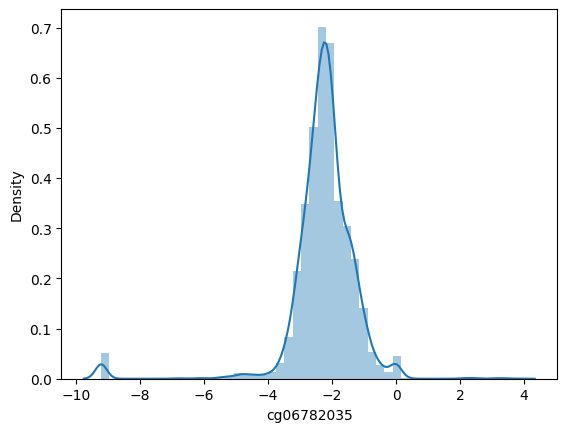

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


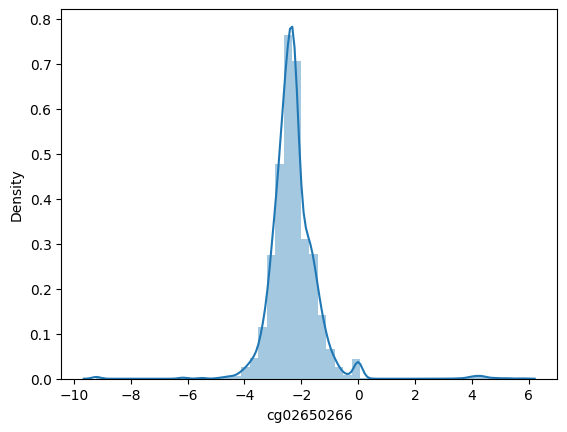

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


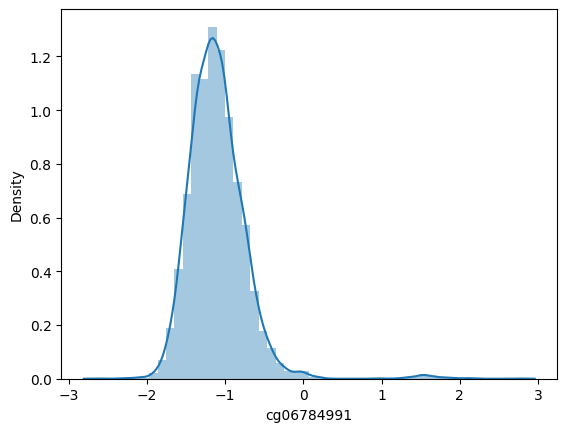

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


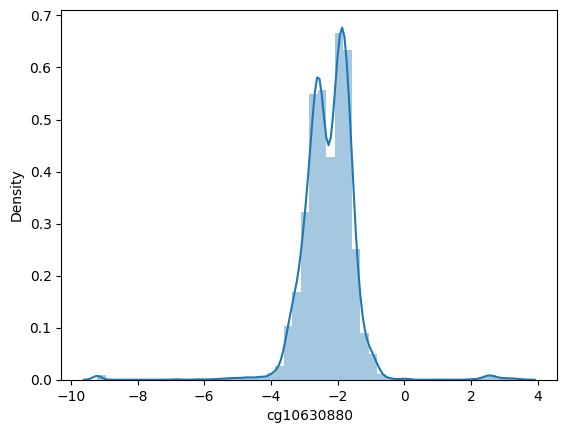

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


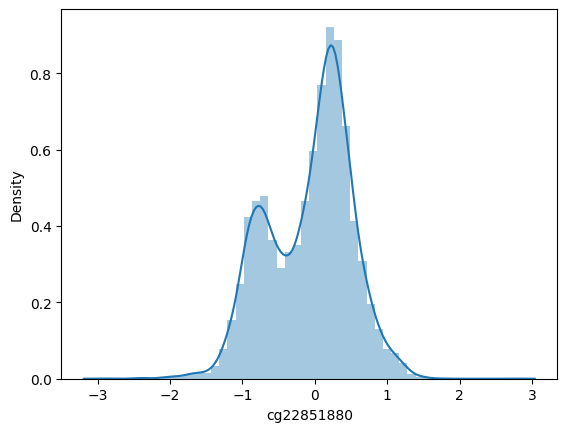

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


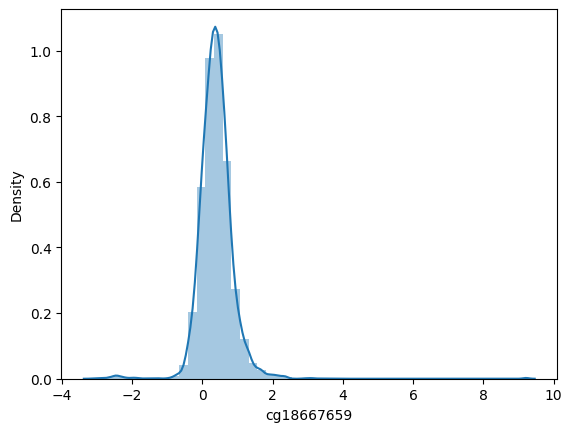

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


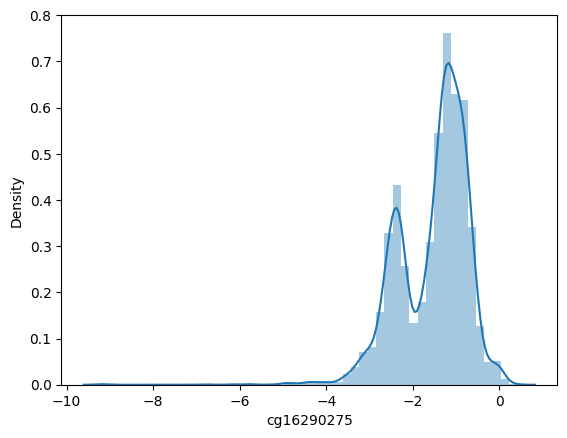

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


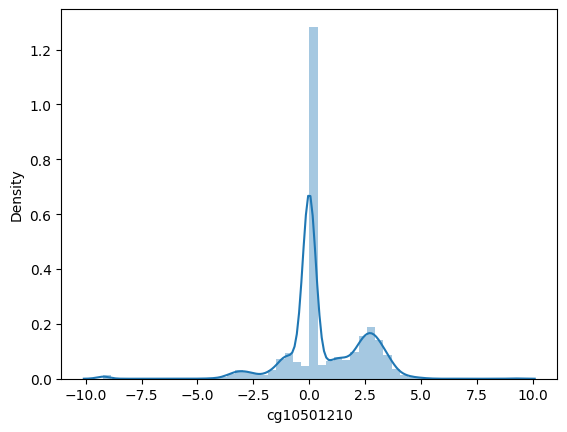

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


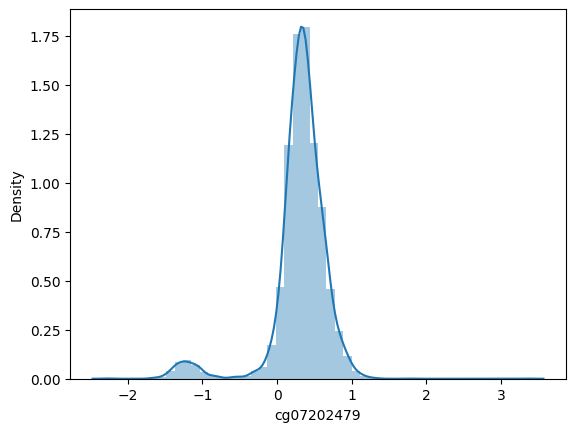

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


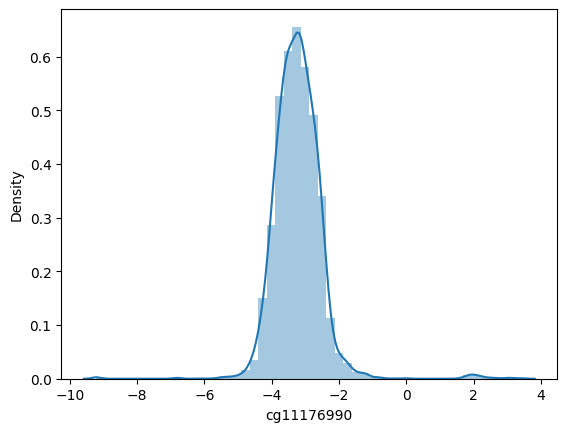

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


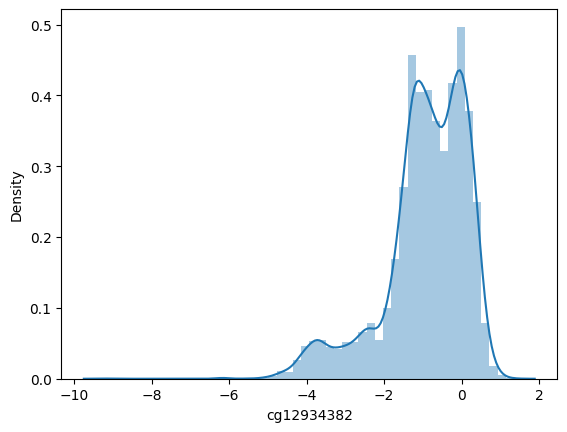

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


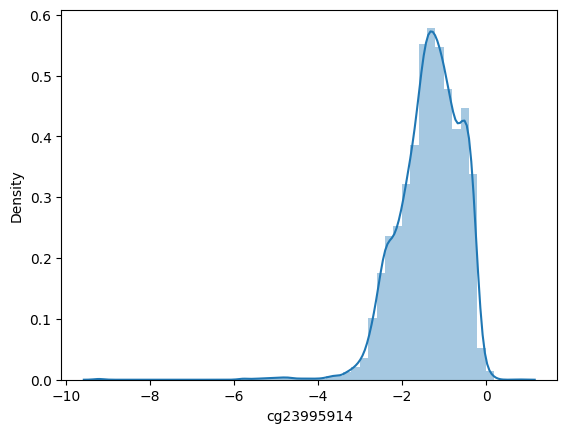

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


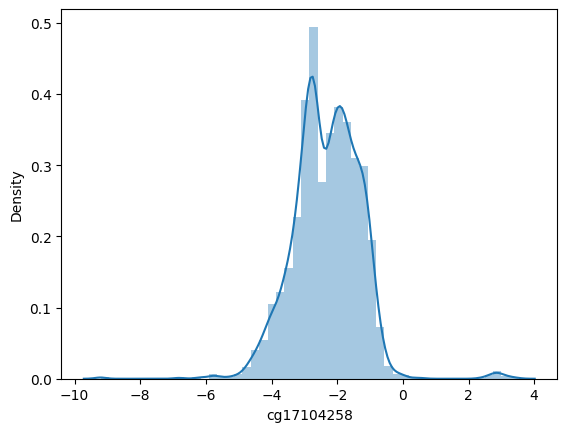

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


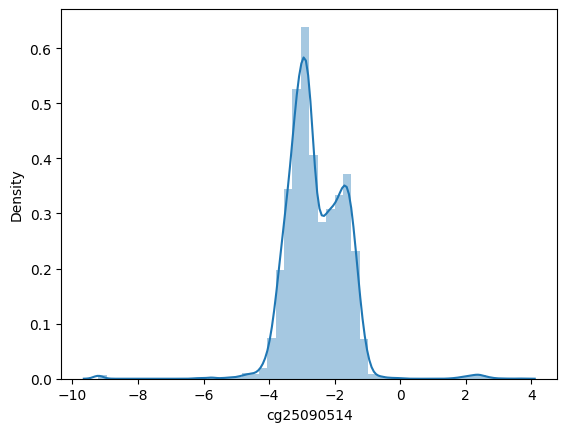

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


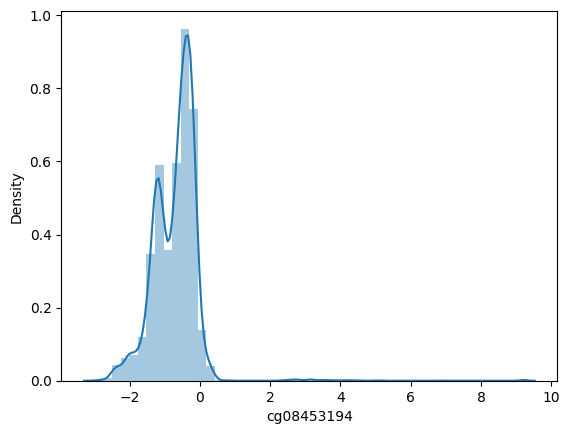

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


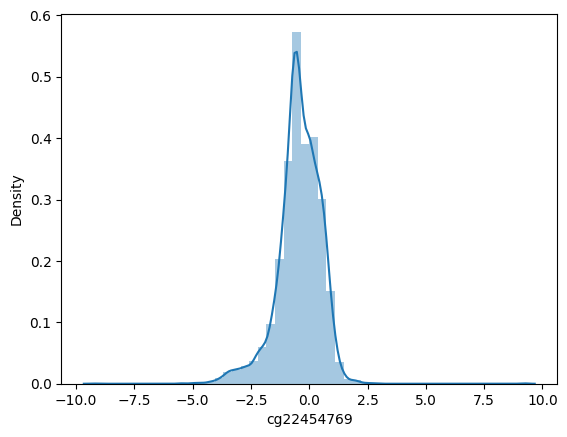

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


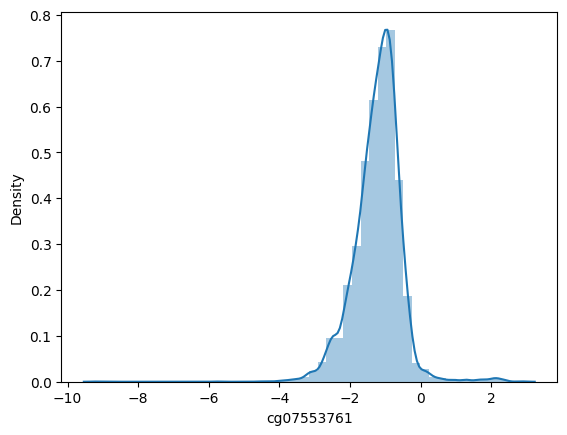

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


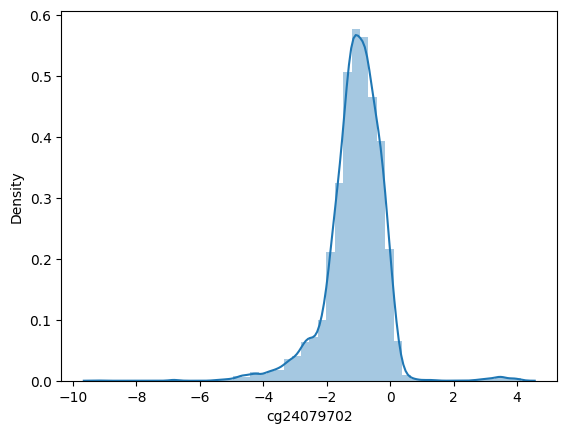

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


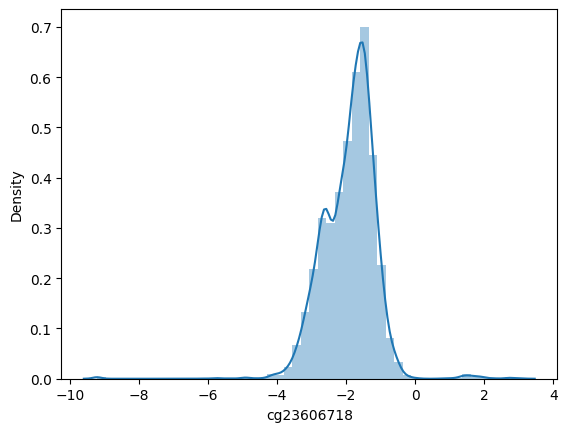

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


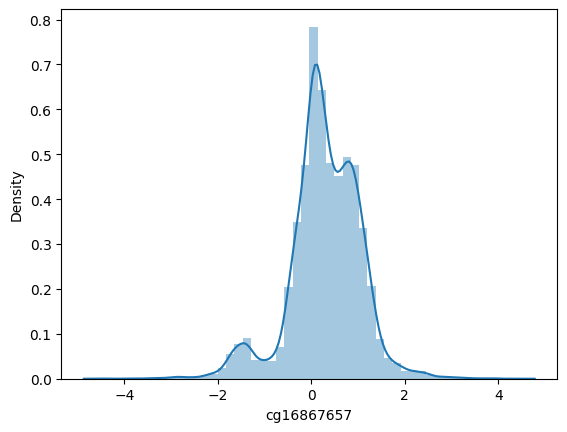

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


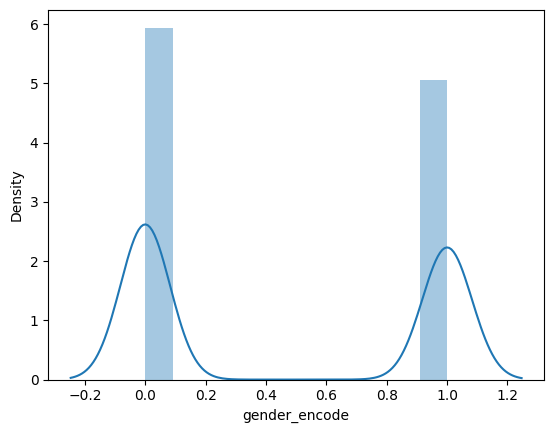

/tmp/ipykernel_26/428250128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)


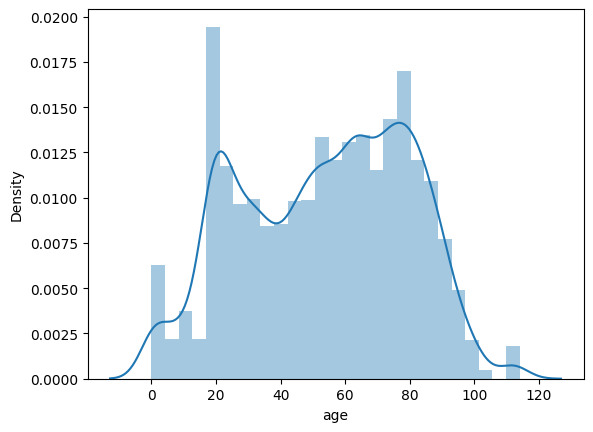

In [5]:
#绘制数据分布图
import matplotlib.pyplot as plt
import seaborn as sns
for age_label in Age_feature:
    fig=plt.figure()
    ax=fig.add_subplot()
    sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)
    plt.show()

In [6]:
#计算斯皮尔曼相关性
from pandas import DataFrame
from scipy.stats import spearmanr
age_spear_list,age_pvalues_spear_list=[],[]
for age_label in Age_feature[:20]:
    stats_spear,pvalues_spear=spearmanr(Age_feature_data.loc[:,age_label],Age_feature_data['age'])
    age_spear_list.append(stats_spear)
    age_pvalues_spear_list.append(pvalues_spear)
Corr_spear=DataFrame(Age_feature[:20])
Corr_spear['Spearman']=age_spear_list
Corr_spear['P_values']=age_pvalues_spear_list
Corr_spear.columns=['cg','Spearman','P_values']
Corr_spear.sort_values('Spearman',ascending=False)

cg  Spearman       P_values
11  cg23995914  0.724931   0.000000e+00
9   cg11176990  0.697864   0.000000e+00
13  cg25090514  0.654536   0.000000e+00
16  cg07553761  0.630504   0.000000e+00
5   cg18667659  0.566513   0.000000e+00
17  cg24079702  0.546958   0.000000e+00
18  cg23606718  0.541610   0.000000e+00
1   cg02650266  0.517605   0.000000e+00
19  cg16867657  0.504503   0.000000e+00
15  cg22454769  0.473058   0.000000e+00
0   cg06782035  0.409698   0.000000e+00
2   cg06784991  0.363914  2.940928e-256
10  cg12934382  0.310387  2.458023e-183
12  cg17104258 -0.131589   3.999642e-33
4   cg22851880 -0.205071   6.913939e-79
3   cg10630880 -0.477016   0.000000e+00
8   cg07202479 -0.536098   0.000000e+00
6   cg16290275 -0.556945   0.000000e+00
14  cg08453194 -0.602760   0.000000e+00
7   cg10501210 -0.645215   0.000000e+00

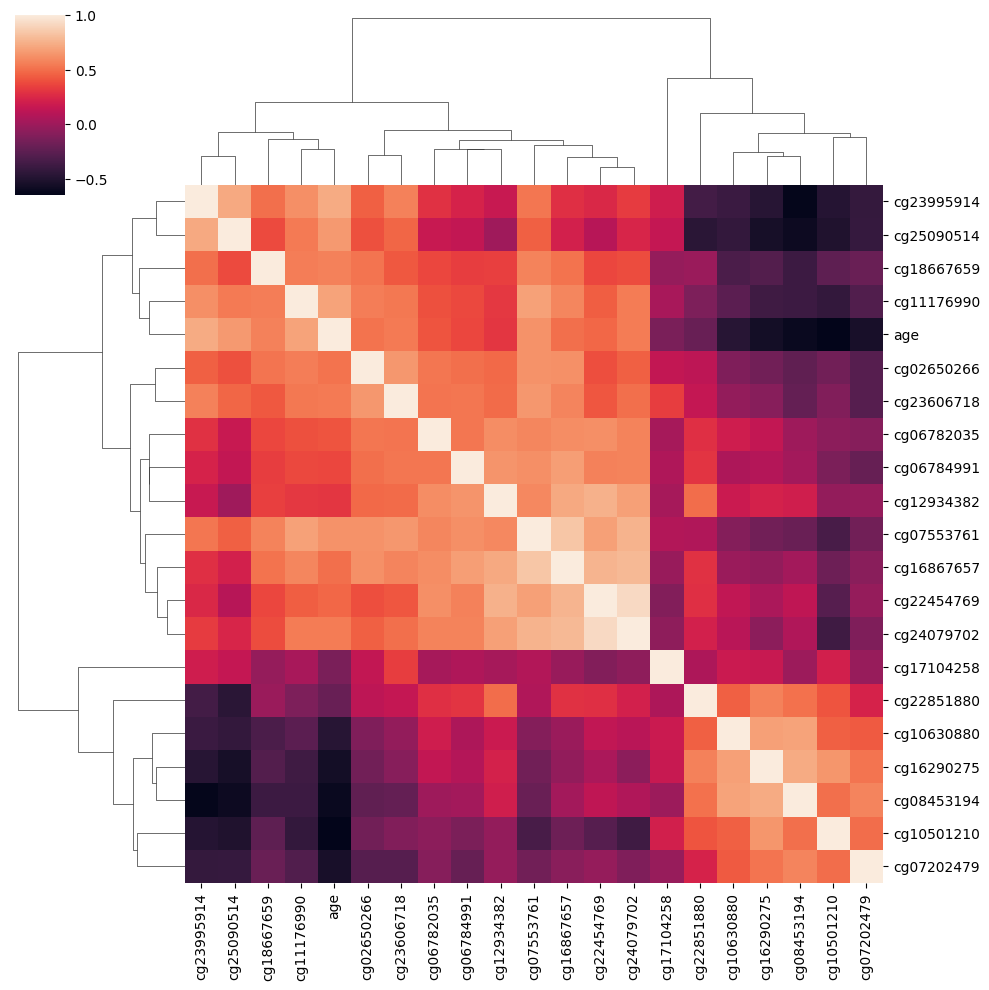

In [7]:
#绘制相关性热力图
Corr_spear,Pvalues_spear=spearmanr(Age_feature_data.iloc[:,:20],Age_feature_data['age'])
sns.clustermap(Corr_spear,annot=False,xticklabels=Age_feature[:20]+['age'],yticklabels=Age_feature[:20]+['age'])    #斯皮尔曼相关系数热力图

<Axes: >

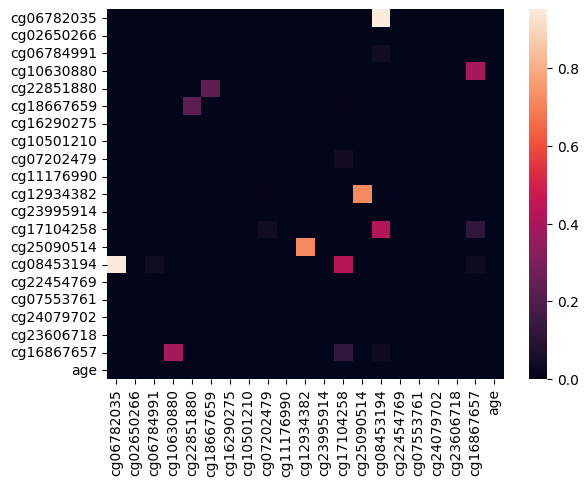

In [8]:
#绘制斯皮尔曼相关系数P值矩阵
sns.heatmap(Pvalues_spear,annot=False,xticklabels=Age_feature[:20]+['age'],yticklabels=Age_feature[:20]+['age'])

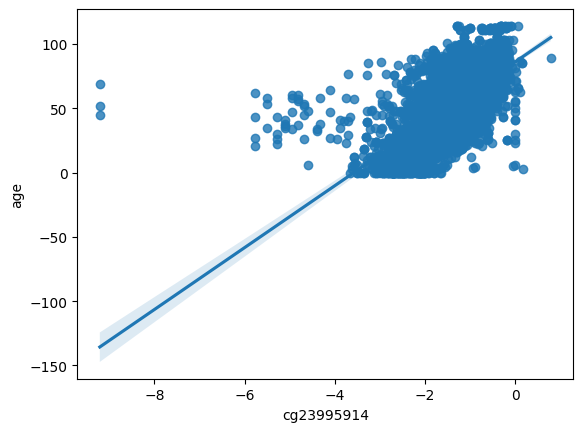

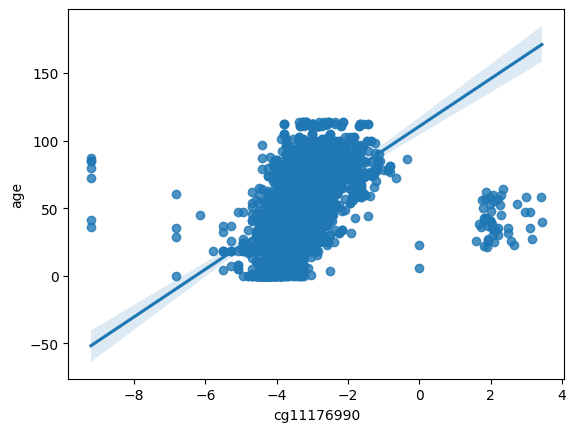

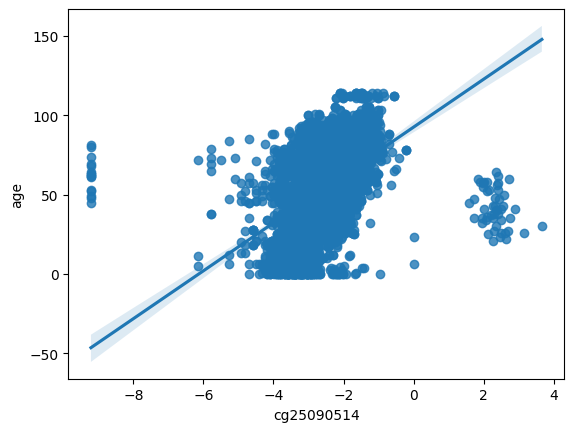

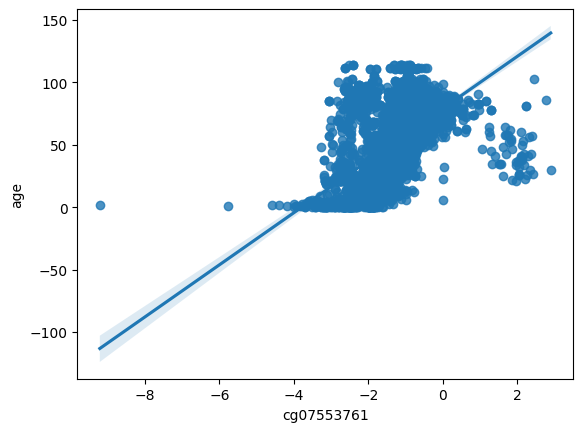

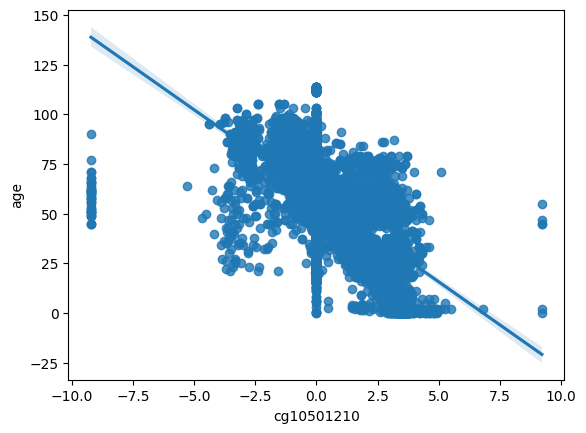

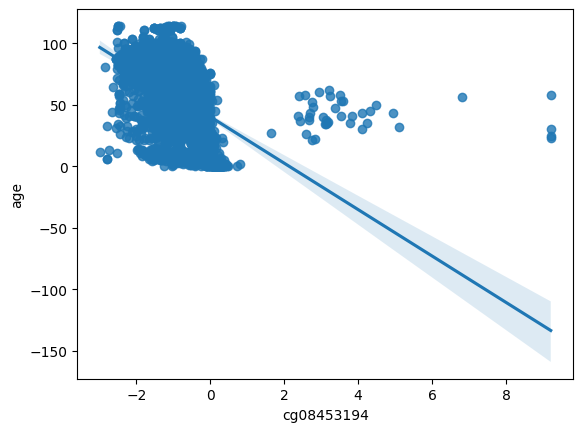

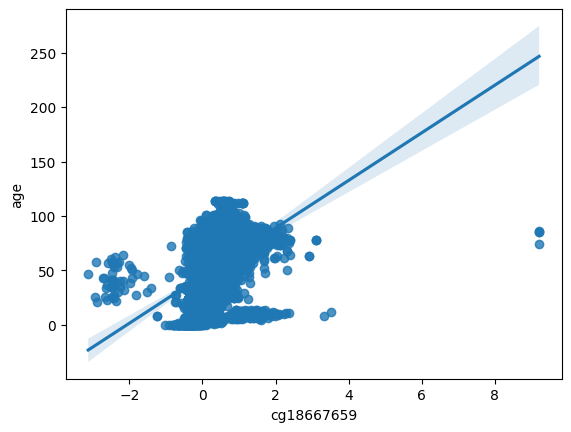

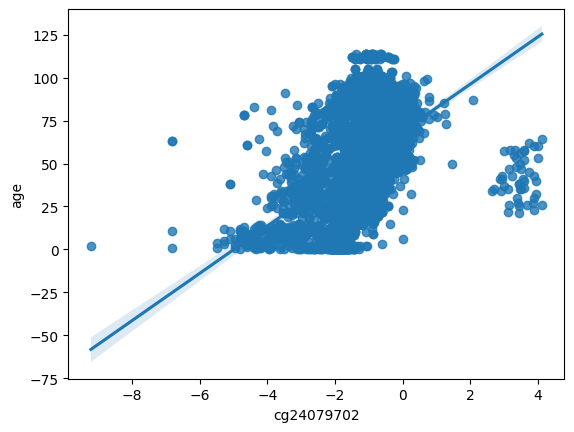

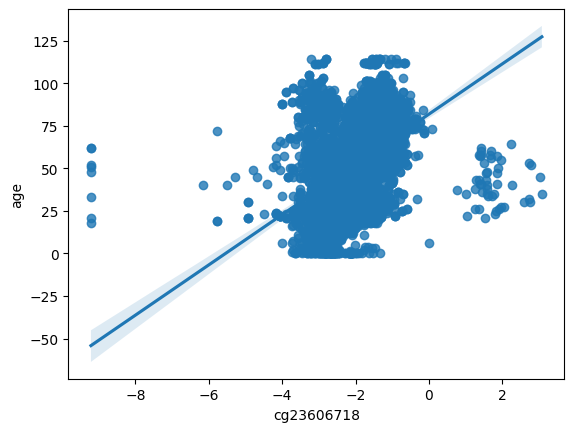

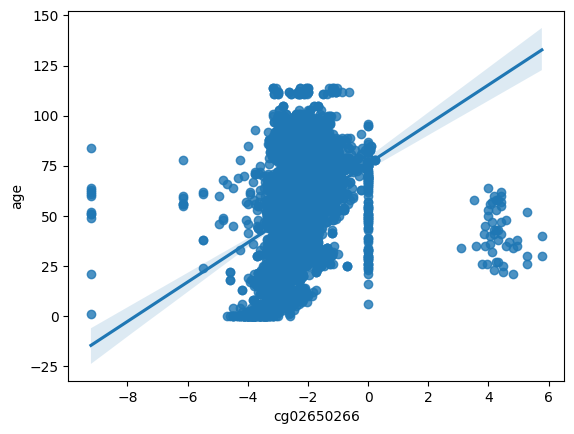

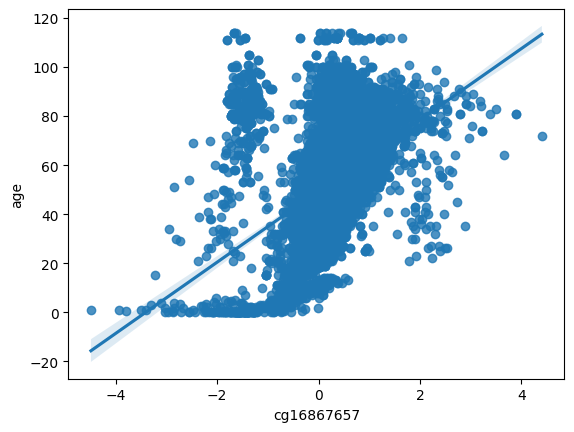

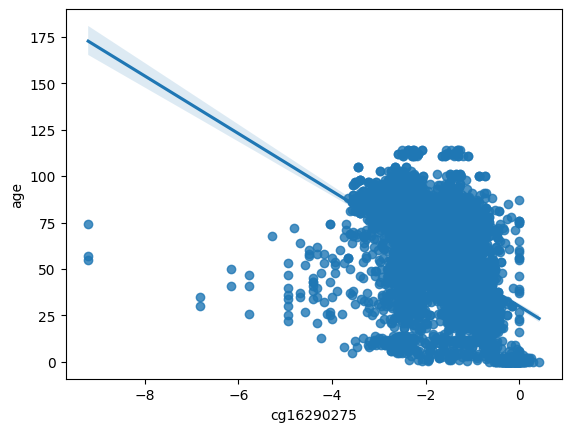

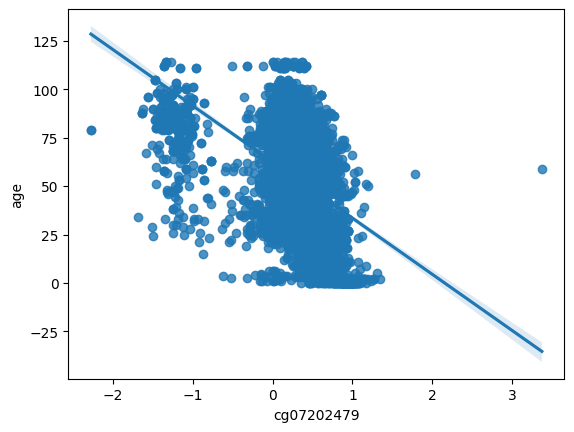

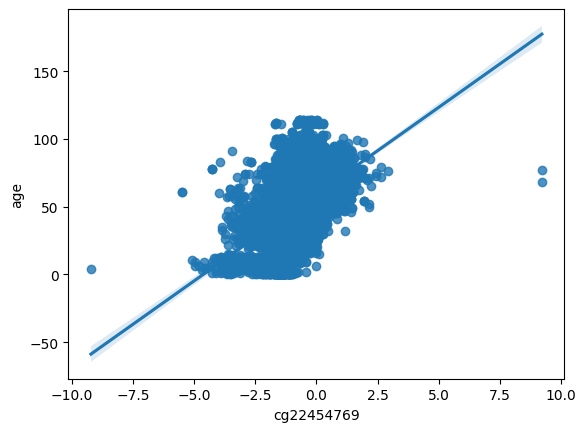

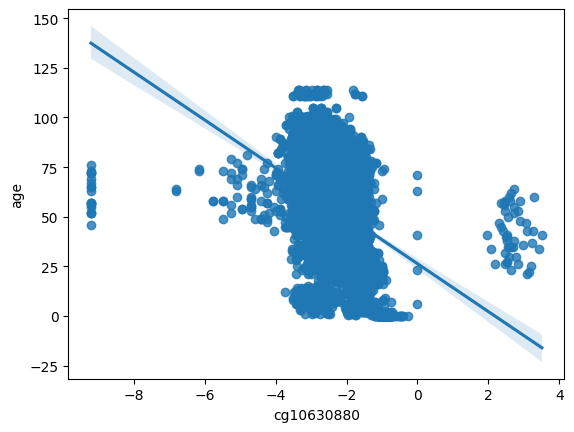

In [9]:
#绘制特征散点图
age_features=['cg23995914','cg11176990','cg25090514','cg07553761','cg10501210','cg08453194',
             'cg18667659','cg24079702','cg23606718','cg02650266','cg16867657','cg16290275',
            'cg07202479','cg22454769','cg10630880']
for age_label in age_features:
    fig=plt.figure()
    scatter=fig.add_subplot()
    sns.regplot(x=age_label,y='age',data=Age_feature_data)
    plt.show()

In [10]:
#查看生物学年龄预测特征数据统计学特征
Age_stats_data=Age_feature_data.loc[:,age_features]
Age_stats_data.describe()

cg23995914   cg11176990   cg25090514   cg07553761   cg10501210  \
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000   
mean     -1.343022    -3.228384    -2.576982    -1.218787     0.615572   
std       0.733910     0.747963     0.896694     0.664375     1.757332   
min      -9.210440    -9.210440    -9.210440    -9.210440    -9.210440   
25%      -1.773795    -3.659672    -3.149987    -1.564056     0.000000   
50%      -1.282902    -3.256540    -2.732410    -1.152395     0.000000   
75%      -0.809306    -2.842141    -1.936120    -0.832866     2.079779   
max       0.790611     3.439160     3.659672     2.901295     9.210440   

        cg08453194   cg18667659   cg24079702   cg23606718   cg02650266  \
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000   
mean     -0.711307     0.387922    -1.090929    -1.908759    -2.276112   
std       0.642854     0.503417     0.902035     0.772630     0.889181   
min      -2.985388    -3.124904    -9.210440    -9.210440    -9.210440   
25%      -1.130596     0.124134    -1.475799    -2.401172    -2.681278   
50%      -0.588284     0.368026    -1.014773    -1.798190    -2.337277   
75%      -0.322708     0.623305    -0.557927    -1.430239    -1.945225   
max       9.210440     9.210440     4.112908     3.076403     5.773449   

        cg16867657   cg16290275   cg07202479   cg22454769   cg10630880  
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000  
mean      0.288584    -1.531984     0.304449    -0.437145    -2.262576  
std       0.762887     0.794849     0.392210     0.936942     0.809762  
min      -4.489850    -9.210440    -2.276579    -9.210440    -9.210440  
25%      -0.072017    -2.207487     0.200630    -0.880658    -2.681278  
50%       0.273640    -1.312567     0.343263    -0.413720    -2.218738  
75%       0.799942    -0.959169     0.497942     0.196592    -1.806416  
max       4.402578     0.422073     3.374769     9.210440     3.507691

<Axes: >

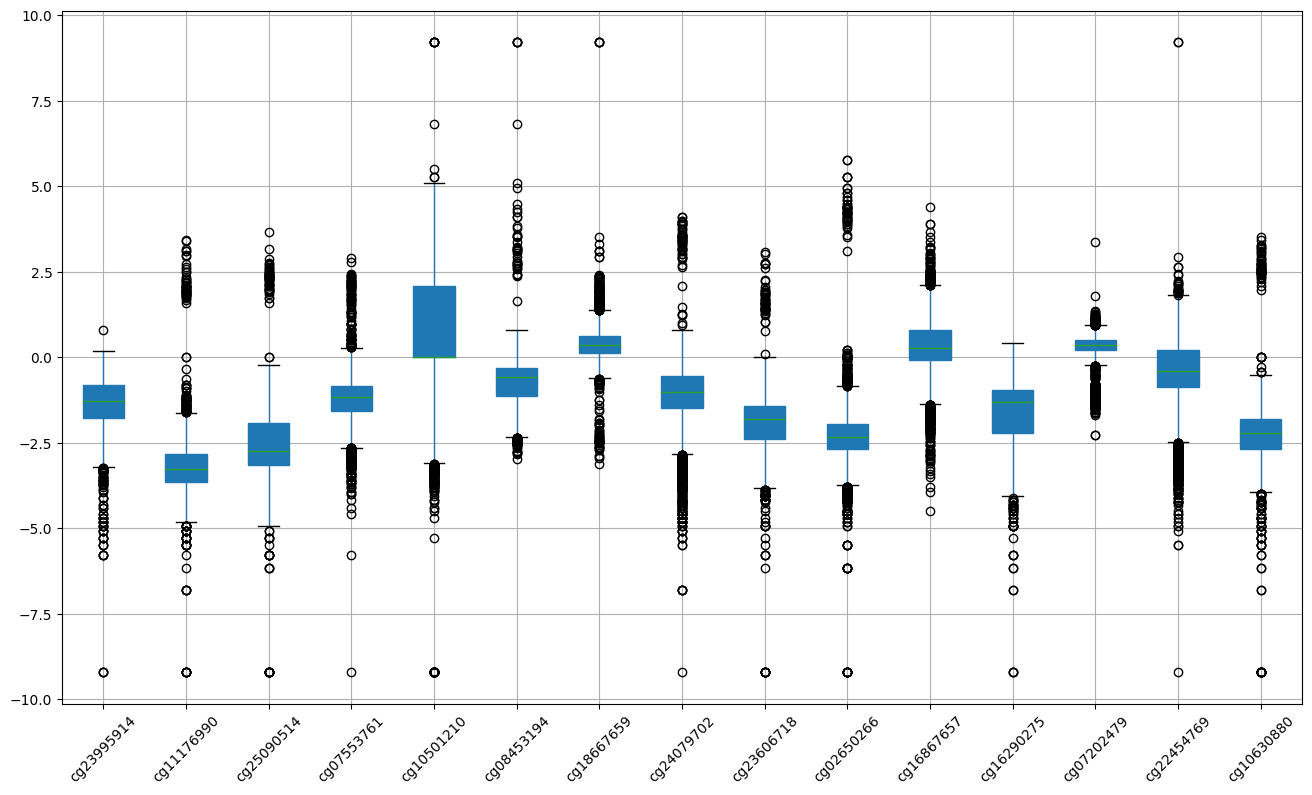

In [11]:
#绘制箱型图
Age_stats_data.boxplot(figsize=(16,9),rot=45,grid=True,patch_artist=True)

In [12]:
#异常数据处理
cg_median=Age_feature_data.iloc[:,:-2].median()
# 定义一个函数来替换异常值  
data_condition=[Age_feature_data['cg23995914']<-4,Age_feature_data['cg11176990']<-5,Age_feature_data['cg11176990']>-1,
           Age_feature_data['cg25090514']<-4.5,Age_feature_data['cg25090514']>0,Age_feature_data['cg07553761']<-5,Age_feature_data['cg07553761']>1,
          Age_feature_data['cg10501210']<-7.5,Age_feature_data['cg10501210']>5,Age_feature_data['cg08453194']>1,Age_feature_data['cg18667659']<-1,
          Age_feature_data['cg18667659']>3,Age_feature_data['cg24079702']<-6,Age_feature_data['cg24079702']>2,
          Age_feature_data['cg23606718']<-4,Age_feature_data['cg23606718']>0,Age_feature_data['cg02650266']<-5,
          Age_feature_data['cg02650266']>2,Age_feature_data['cg16290275']<-5,Age_feature_data['cg07202479']<-2,
           Age_feature_data['cg07202479']>1.5,Age_feature_data['cg22454769']<-5,Age_feature_data['cg22454769']>7.5,
              Age_feature_data['cg10630880']<-4,Age_feature_data['cg10630880']>0]
cg_condition=['cg23995914','cg11176990','cg11176990','cg25090514','cg25090514','cg07553761','cg07553761','cg10501210','cg10501210',
             'cg08453194','cg18667659','cg18667659','cg24079702','cg24079702','cg23606718','cg23606718','cg02650266','cg02650266',
             'cg16290275','cg07202479','cg07202479','cg22454769','cg22454769','cg10630880','cg10630880']
for condition,cg in zip(data_condition,cg_condition):
    condition_data=Age_feature_data.loc[condition,cg]    #选择数据
    Age_feature_data[cg].replace(list(condition_data),cg_median[cg],inplace=True)    #替换数据

In [13]:
#进行数据归一化
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Stand_data=Age_feature_data.loc[:,age_features]
Stand=StandardScaler()    #标准化归一化
Var_Age=Stand.fit(Stand_data)
Stand=Var_Age.transform(Stand_data)
MaxMin=MinMaxScaler(feature_range=(-1, 1))    #最大值-最小值归一化
MaxMin_stand=MaxMin.fit_transform(Stand)
Stand_data=DataFrame(MaxMin_stand)
Stand_data.columns=age_features
Stand_data['gender_encode']=Age_feature_data.loc[:,'gender_encode']
Stand_data['age']=Age_feature_data.loc[:,'age']

In [14]:
#查看预处理后的数据统计学特征
Stand_data.describe()

cg23995914   cg11176990   cg25090514   cg07553761   cg10501210  \
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000   
mean      0.105732    -0.120063    -0.150284     0.201637     0.160876   
std       0.286249     0.296831     0.327972     0.215637     0.308969   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -0.077629    -0.332266    -0.391986     0.084906     0.032588   
50%       0.123176    -0.122141    -0.217150     0.232732     0.032588   
75%       0.323445     0.083760     0.125305     0.344068     0.437841   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        cg08453194   cg18667659   cg24079702   cg23606718   cg02650266  \
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000   
mean      0.186681    -0.312346     0.260264     0.042618     0.024554   
std       0.282017     0.212080     0.234579     0.329371     0.256832   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -0.022429    -0.450547     0.156159    -0.195919    -0.123135   
50%       0.263398    -0.327902     0.288848     0.099505     0.010367   
75%       0.401206    -0.195159     0.415350     0.280547     0.151769   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        cg16867657   cg16290275   cg07202479   cg22454769   cg10630880  \
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000   
mean      0.074720     0.274053     0.312192     0.145728    -0.130274   
std       0.171581     0.286476     0.255765     0.232728     0.293348   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -0.006383     0.023494     0.243753     0.032775    -0.342727   
50%       0.071359     0.353085     0.337695     0.151551    -0.111096   
75%       0.189729     0.484881     0.439571     0.305771     0.091241   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       gender_encode          age  
count    8164.000000  8233.000000  
mean        0.459946    53.659753  
std         0.498424    25.824928  
min         0.000000     0.000000  
25%         0.000000    31.400000  
50%         0.000000    56.000000  
75%         1.000000    75.000000  
max         1.000000   114.000000

<Axes: >

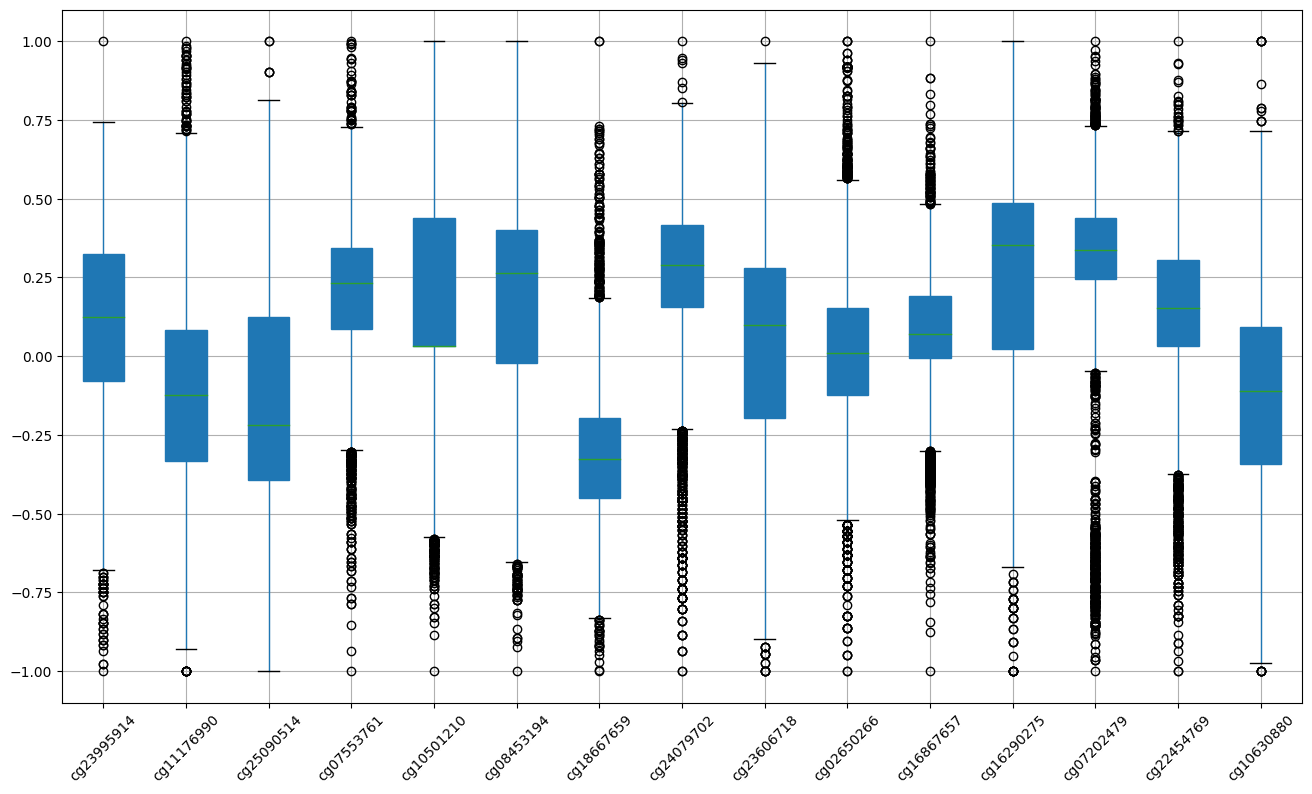

In [15]:
#绘制预处理后的数据箱型图
Stand_data.iloc[:,:-2].boxplot(figsize=(16,9),grid=True,rot=45,patch_artist=True)

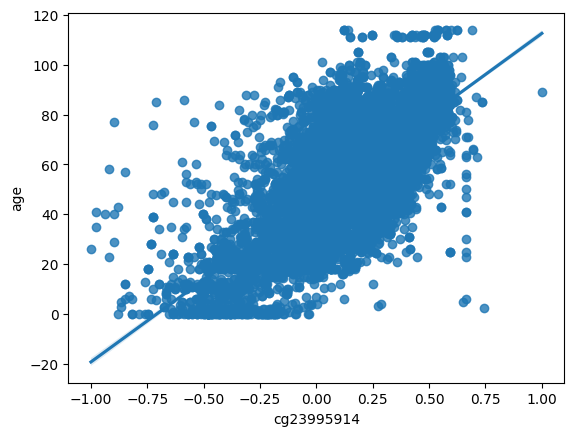

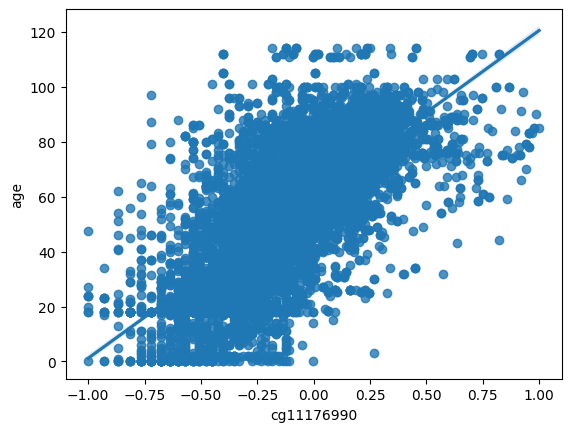

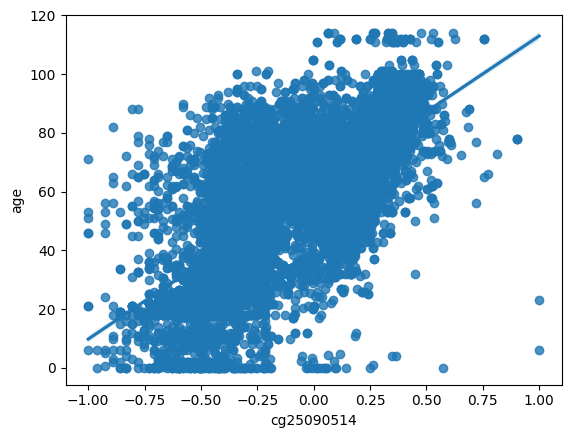

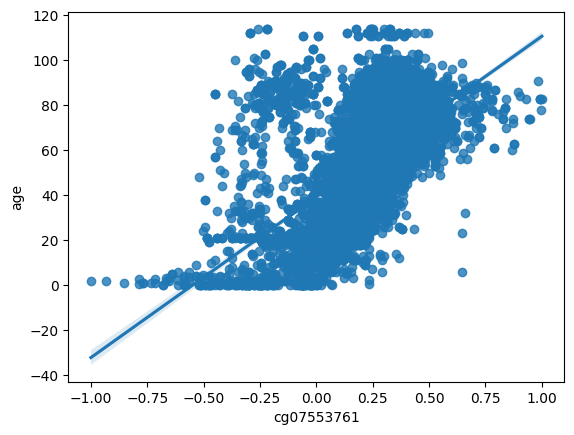

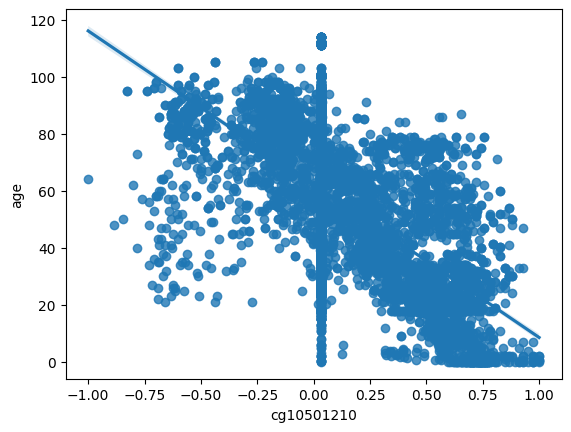

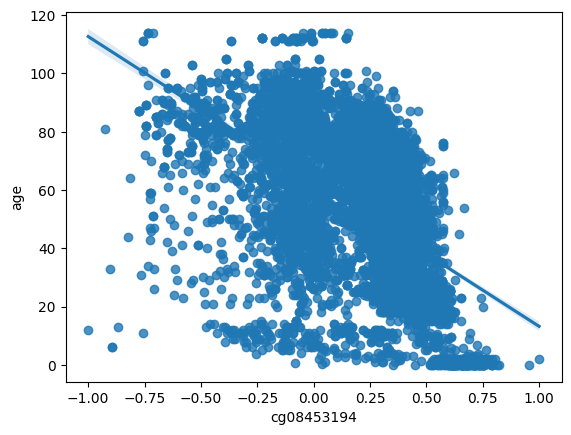

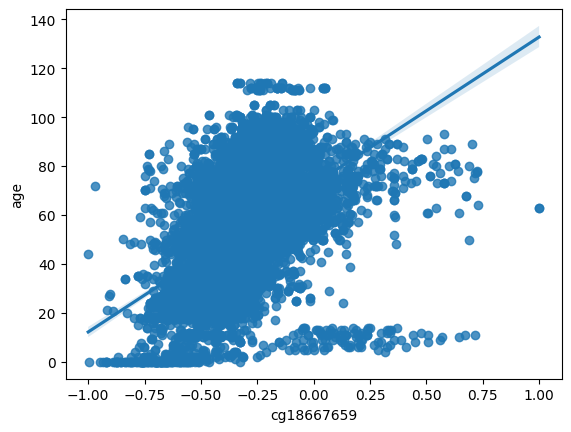

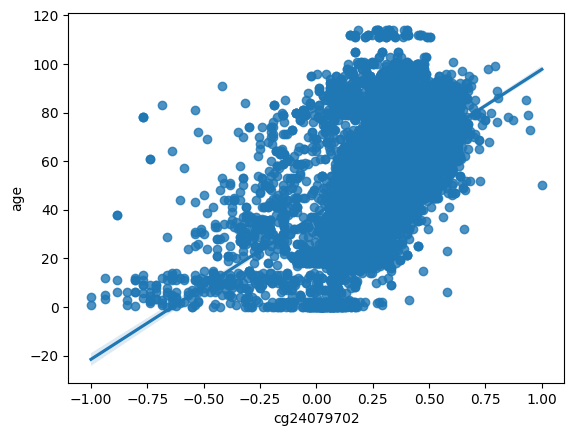

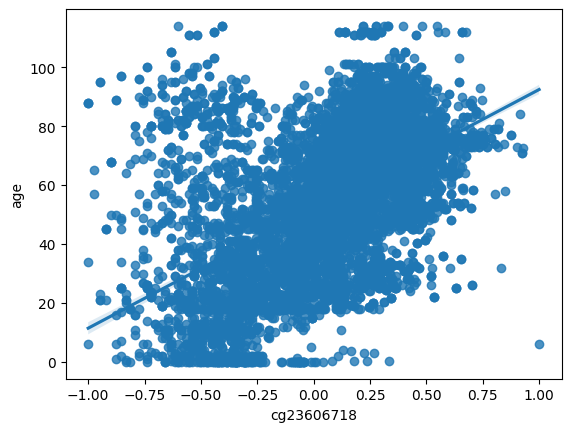

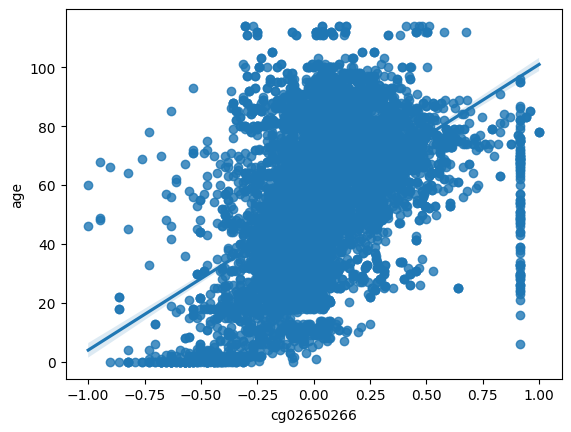

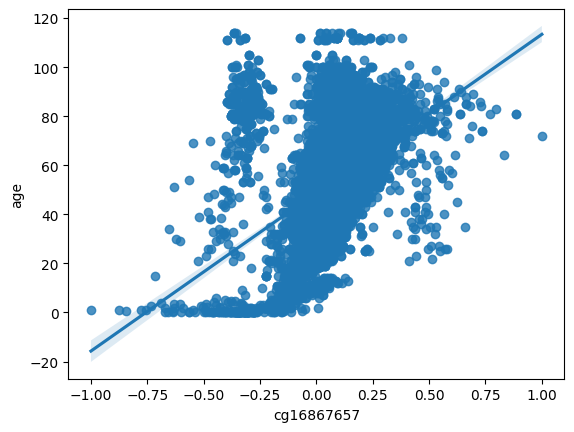

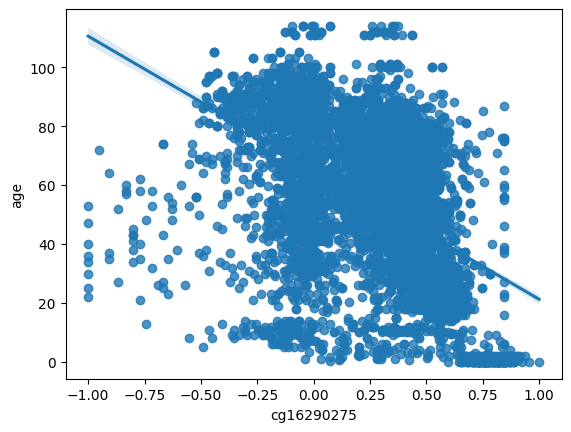

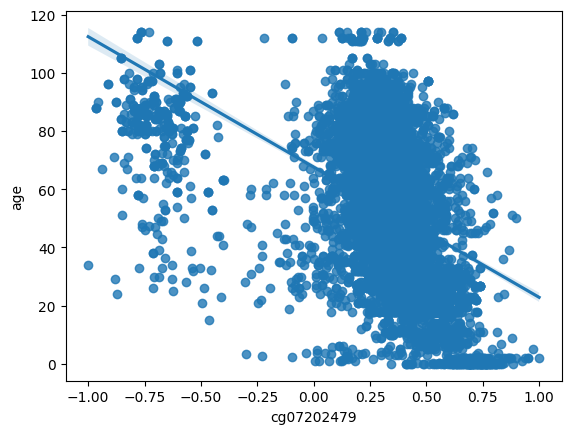

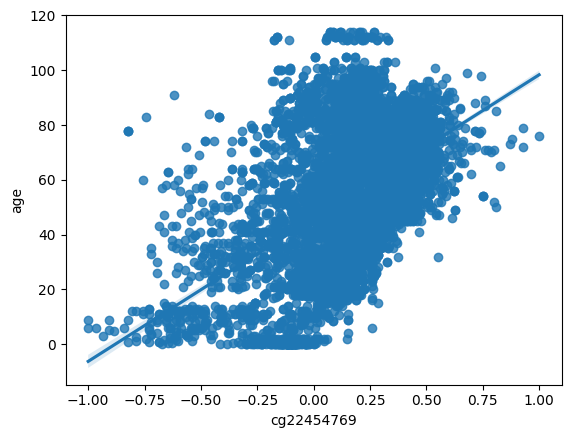

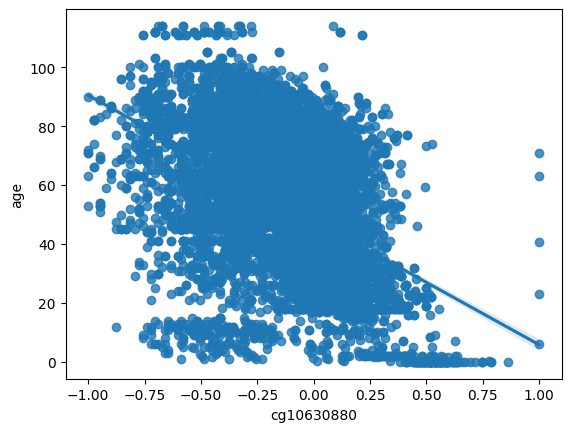

In [16]:
for age_label in age_features:
    fig=plt.figure()
    scatter=fig.add_subplot()
    sns.regplot(x=age_label,y='age',data=Stand_data)
    plt.show()

In [17]:
#构建特征子集数据
AgeDl_data=Stand_data.loc[:,age_features]
AgeDl_label=Stand_data['age']
from sklearn.model_selection import train_test_split
Age_feature_,Age_feature_test,Age_target,Age_test=train_test_split(AgeDl_data,AgeDl_label,train_size=0.8,random_state=123)    #X表示数据输入特征，y表示数据标签，即生物学年龄
Age_feature_train=Age_feature_[:5000]    #划分训练数据和转化格式
Age_train=Age_target[:5000]
Age_feature_valid=Age_feature_[5000:]    #划分验证数据并转化格式
Age_valid=Age_target[5000:]
print('训练集数据规模为:{0},验证集数据规模为:{1},测试集数据规模为:{2}'.format(Age_feature_train.shape,Age_feature_valid.shape,Age_feature_test.shape))
print('训练集标签规模为:{0},验证集标签规模为:{1},测试集标签规模为:{2}'.format(Age_train.shape,Age_valid.shape,Age_test.shape))

训练集数据规模为:(5000, 15),验证集数据规模为:(1586, 15),测试集数据规模为:(1647, 15)
训练集标签规模为:(5000,),验证集标签规模为:(1586,),测试集标签规模为:(1647,)


尝试机器学习模型：XGBoost,CatBoost和LightBM模型

In [18]:
#载入并训练XGBoost模型
from xgboost import XGBRegressor
Model_XGB=XGBRegressor(booster='gbtree',n_estimators=2000,max_depth=5,objective='reg:squarederror',gpu_id=0, tree_method='gpu_hist')
Model_XGB.fit(Age_feature_train,Age_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
#模型评估
from sklearn.metrics import mean_squared_error,mean_absolute_error
def Model_Evelation(model,X_train,y_train,X_test,y_test):
    #Train_Error=1-model.score(X_train,y_train)    #训练误差
    #Test_Error=1-model.score(X_test,y_test)    #测试误差
    #print('模型训练误差为:{0},测试误差为:{1}'.format(Train_Error,Test_Error))
    Train_mae=mean_absolute_error(y_train,model.predict(X_train))    #训练MAE
    Test_mae=mean_absolute_error(y_test,model.predict(X_test))    #测试MAE
    print('模型训练MAE为:{0},测试MAE为:{1}'.format(Train_mae,Test_mae))
    Train_mse=mean_squared_error(y_train,model.predict(X_train))    #训练MSE
    Test_mse=mean_squared_error(y_test,model.predict(X_test))    #测试MSE
    print('模型训练MSE为:{0},测试MSE为:{1}'.format(Train_mse,Test_mse))
Model_Evelation(model=Model_XGB,X_train=Age_feature_train,y_train=Age_train,X_test=Age_feature_test,y_test=Age_test)

模型训练MAE为:0.014830413427068145,测试MAE为:4.2181533190888745
模型训练MSE为:0.13027643998297656,测试MSE为:50.33768864856002


In [20]:
#分别训练lightgbm模型
import lightgbm as lgb
Data_train_lgb=lgb.Dataset(Age_feature_train,Age_train)
Data_test_lgb=lgb.Dataset(Age_feature_test,Age_test)
params_lgb={
                'boosting_type': 'gbdt',
                'objective': 'regression',
                'metric': 'mae',
                'min_child_weight': 6,
                'num_leaves': 2 ** 6,
                'lambda_l2': 10,
                'feature_fraction': 0.9,
                'bagging_fraction': 0.9,
                'bagging_freq': 15,
                'learning_rate': 0.1,
                'seed': 2023,
                'nthread' : 16,
                'verbose' : -1,
            }
Model_LGB=lgb.train(params_lgb,Data_train_lgb)

In [21]:
Model_Evelation(model=Model_LGB,X_train=Age_feature_train,y_train=Age_train,X_test=Age_feature_test,y_test=Age_test)

模型训练MAE为:2.3391540651093456,测试MAE为:4.393753778591244
模型训练MSE为:11.530136568654148,测试MSE为:43.84131925642455


In [22]:
#训练catBoost模型
from catboost import CatBoostRegressor
Model_Cat=CatBoostRegressor(learning_rate=0.5, depth=5, bootstrap_type='Bernoulli',
                            random_seed=2023,od_type='Iter', od_wait=100)
Model_Cat.fit(Age_feature_train,Age_train)

0:	learn: 17.9436972	total: 54.1ms	remaining: 54s
1:	learn: 13.7376499	total: 56.1ms	remaining: 28s
2:	learn: 11.7109603	total: 58ms	remaining: 19.3s
3:	learn: 10.5035112	total: 59.7ms	remaining: 14.9s
4:	learn: 9.9026803	total: 61.4ms	remaining: 12.2s
5:	learn: 9.5226509	total: 63ms	remaining: 10.4s
6:	learn: 9.1957200	total: 64.7ms	remaining: 9.18s
7:	learn: 9.0075846	total: 66.6ms	remaining: 8.26s
8:	learn: 8.8458273	total: 68.5ms	remaining: 7.54s
9:	learn: 8.6625853	total: 70.2ms	remaining: 6.95s
10:	learn: 8.5486947	total: 71.9ms	remaining: 6.46s
11:	learn: 8.3925549	total: 73.6ms	remaining: 6.06s
12:	learn: 8.2689145	total: 75.3ms	remaining: 5.71s
13:	learn: 8.2101273	total: 77.1ms	remaining: 5.43s
14:	learn: 8.1289726	total: 78.9ms	remaining: 5.18s
15:	learn: 8.0453744	total: 80.6ms	remaining: 4.96s
16:	learn: 7.9095768	total: 82.3ms	remaining: 4.76s
17:	learn: 7.8302568	total: 83.9ms	remaining: 4.58s
18:	learn: 7.7902867	total: 85.5ms	remaining: 4.42s
19:	learn: 7.7452826	total

In [23]:
Model_Evelation(model=Model_Cat,X_train=Age_feature_train,y_train=Age_train,X_test=Age_feature_test,y_test=Age_test)

模型训练MAE为:0.705718556160692,测试MAE为:4.57969903427714
模型训练MSE为:1.048199065567144,测试MSE为:52.05954348670108


载入SHAP库计算SHAP值

In [24]:
import shap
Explainer=shap.TreeExplainer(Model_XGB)    #创建训练集解释器
shap_values=Explainer.shap_values(Age_feature_train)    #计算训练shap值

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


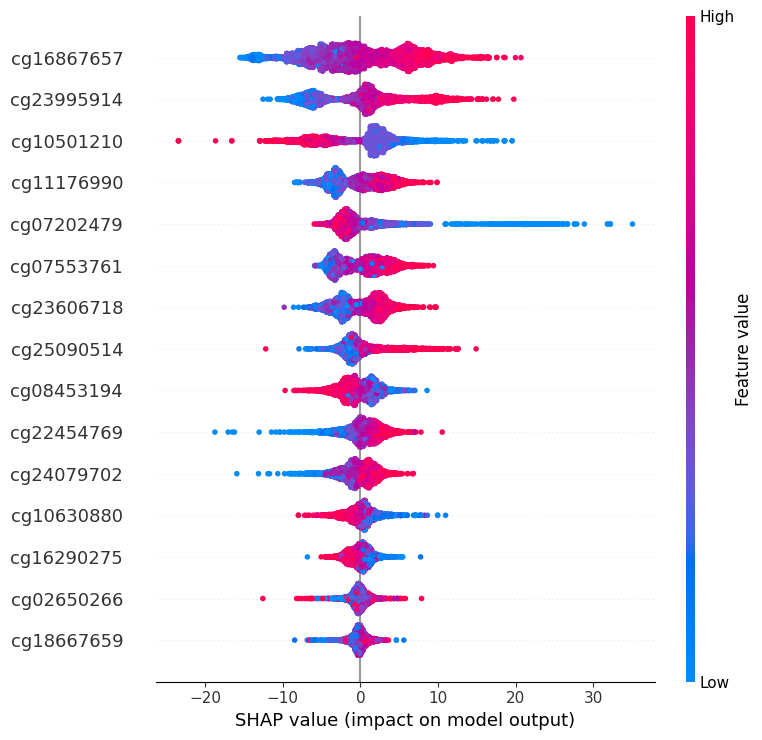

In [25]:
shap.summary_plot(shap_values,Age_feature_train)    #全局特征SHAP分布(训练)

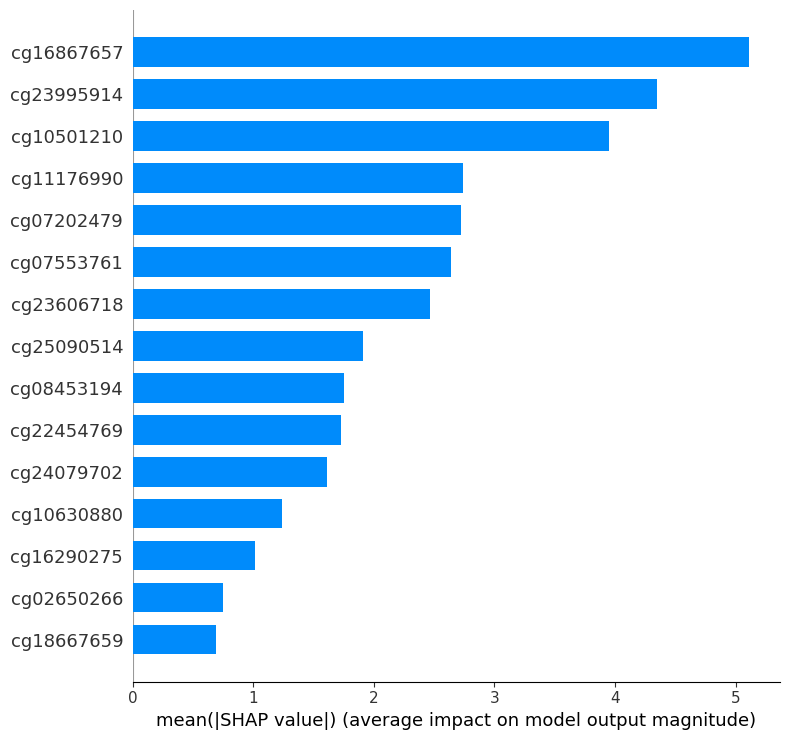

In [26]:
shap.summary_plot(shap_values,Age_feature_train,plot_type='bar')    #特征重要性堆叠图(训练)

In [27]:
Explainer_test=shap.TreeExplainer(Model_XGB)    #创建测试集解释器
shap_values_test=Explainer_test.shap_values(Age_feature_train)    #计算测试shap值

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


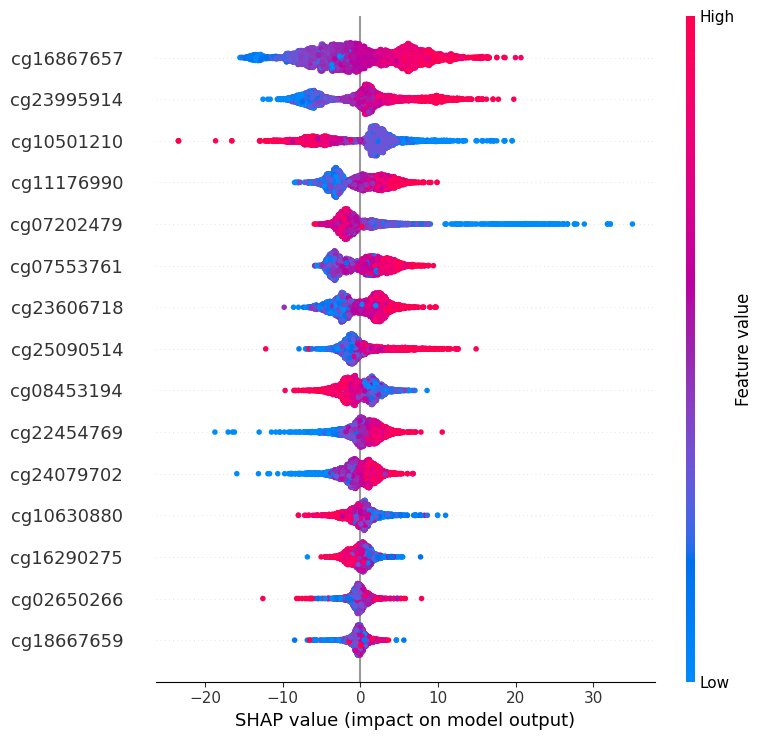

In [28]:
shap.summary_plot(shap_values_test,Age_feature_train)    #全局特征SHAP分布(测试)

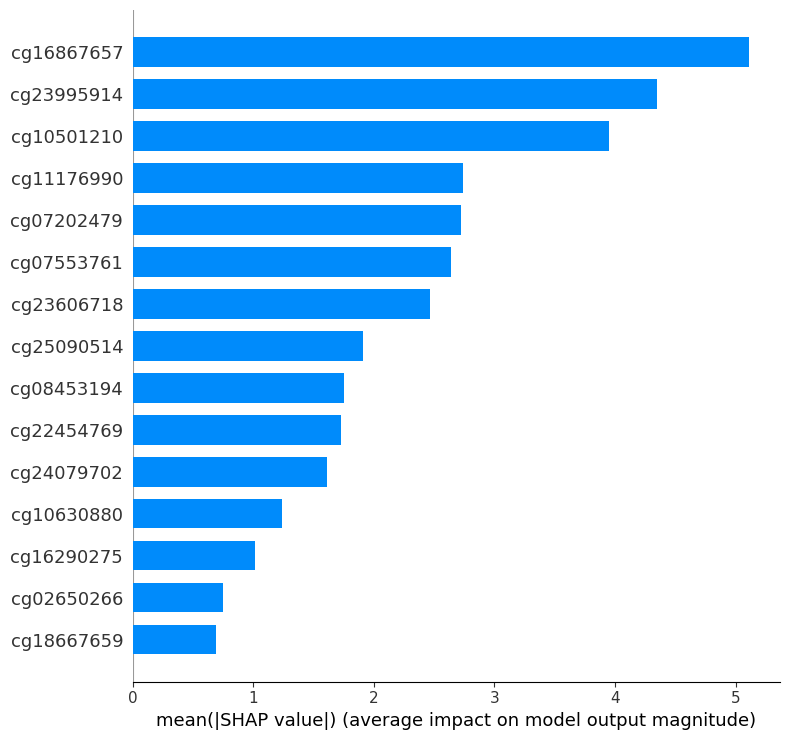

In [29]:
shap.summary_plot(shap_values_test,Age_feature_train,plot_type='bar')    #特征重要性堆叠图(测试)

In [30]:
#保存模型
import joblib
Model_list=[Model_XGB,Model_LGB,Model_Cat]
Model_name=['XGBoost_Age.pkl','LightGBM_Age.pkl','Model_CatBoost.pkl']
try:
    for model,name in zip(Model_list,Model_name):
        joblib.dump(model,name)
    print('模型保存成功!')
except:
    print('模型保存失败')

模型保存成功!


尝试训练深度学习模型

In [31]:
#构建数据输入流
Age_TrainData=tf.data.Dataset.from_tensor_slices((Age_feature_train,Age_train)).repeat(10)    #训练集
Age_TrainData=Age_TrainData.shuffle(buffer_size=1000, seed=2023)
Age_TrainData=Age_TrainData.batch(batch_size=100).prefetch(tf.data.experimental.AUTOTUNE)
Age_ValidData=tf.data.Dataset.from_tensor_slices((Age_feature_valid,Age_valid)).repeat(10)    #验证集
Age_ValidData=Age_ValidData.shuffle(buffer_size=1000, seed=2023)
Age_ValidData=Age_ValidData.batch(batch_size=100).prefetch(tf.data.experimental.AUTOTUNE)
Age_TestData=tf.data.Dataset.from_tensor_slices((Age_feature_test,Age_test)).repeat(10)    #测试集
Age_TestData=Age_TestData.shuffle(buffer_size=1000, seed=2023)
Age_TestData=Age_TestData.batch(batch_size=100).prefetch(tf.data.experimental.AUTOTUNE)

In [32]:
#模型组网
import numpy as np
from tensorflow import keras
Age_NN=keras.models.Sequential()
Age_NN.add(keras.layers.Input(shape=[15]))    #输入层
Age_NN.add(keras.layers.Dense(39,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1)))
Age_NN.add(keras.layers.Dense(78,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1)))
Age_NN.add(keras.layers.BatchNormalization())
Age_NN.add(keras.layers.Dropout(0.5))
Age_NN.add(keras.layers.Dense(500,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1)))
Age_NN.add(keras.layers.BatchNormalization())
Age_NN.add(keras.layers.Dropout(0.5))
Age_NN.add(keras.layers.Dense(1500,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1)))
Age_NN.add(keras.layers.BatchNormalization())
Age_NN.add(keras.layers.Dropout(0.5))
Age_NN.add(keras.layers.Dense(3000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1)))
Age_NN.add(keras.layers.BatchNormalization())
Age_NN.add(keras.layers.Dropout(0.5))
for layer in np.arange(1,11):
    Age_NN.add(keras.layers.Dense(3000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1)))
    Age_NN.add(keras.layers.BatchNormalization())
    Age_NN.add(keras.layers.Dropout(0.5))
Age_NN.add(keras.layers.Dense(3000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1)))
Age_NN.add(keras.layers.BatchNormalization())
Age_NN.add(keras.layers.Dropout(0.5))
Age_NN.add(keras.layers.Dense(1500,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1)))
Age_NN.add(keras.layers.BatchNormalization())
Age_NN.add(keras.layers.Dropout(0.5))
Age_NN.add(keras.layers.Dense(750,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1)))
Age_NN.add(keras.layers.BatchNormalization())
Age_NN.add(keras.layers.Dropout(0.5))
Age_NN.add(keras.layers.Dense(78,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1)))
Age_NN.add(keras.layers.BatchNormalization())
Age_NN.add(keras.layers.Dropout(0.5))
Age_NN.add(keras.layers.Dense(13,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                              kernel_constraint=keras.constraints.max_norm(1)))
Age_NN.add(keras.layers.Dense(1))    #输出层
Age_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 39)                624       
                                                                 
 dense_1 (Dense)             (None, 78)                3120      
                                                                 
 batch_normalization (BatchN  (None, 78)               312       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 78)                0         
                                                                 
 dense_2 (Dense)             (None, 500)               39500     
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                        

In [33]:
#模型编译及训练
age_train_epochs=300
Age_lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=10)    #学习率性能调度
Age_CheckPoint_model=keras.callbacks.ModelCheckpoint('Age_NN_Net',save_best_only=True)    #设置提前停止
Age_EarlyStopping_model=keras.callbacks.EarlyStopping(patience=50,restore_best_weights=True)
Age_NN.compile(loss='MAE',optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics='MAE')
Age_NN_history=Age_NN.fit(Age_TrainData,epochs=age_train_epochs,
                            validation_data=(Age_ValidData),verbose=1,callbacks=[Age_lr_scheduler,Age_CheckPoint_model,Age_EarlyStopping_model])

Epoch 1/300
500/500 [==============================] - 62s 86ms/step - loss: 1410.4058 - MAE: 33.7687 - val_loss: 907.0106 - val_MAE: 29.2072 - lr: 0.0010
Epoch 2/300
500/500 [==============================] - 25s 50ms/step - loss: 1180.5103 - MAE: 16.4995 - val_loss: 1096.5554 - val_MAE: 16.6814 - lr: 0.0010
Epoch 3/300
500/500 [==============================] - 25s 50ms/step - loss: 1171.8439 - MAE: 15.3999 - val_loss: 1302.9642 - val_MAE: 19.7645 - lr: 0.0010
Epoch 4/300
500/500 [==============================] - 25s 50ms/step - loss: 1120.3419 - MAE: 14.4651 - val_loss: 1278.1902 - val_MAE: 12.1318 - lr: 0.0010
Epoch 5/300
500/500 [==============================] - 25s 50ms/step - loss: 1051.8708 - MAE: 14.0319 - val_loss: 1088.1399 - val_MAE: 19.1660 - lr: 0.0010
Epoch 6/300
500/500 [==============================] - 25s 50ms/step - loss: 1018.0206 - MAE: 13.7804 - val_loss: 1118.9856 - val_MAE: 21.3500 - lr: 0.0010
Epoch 7/300
500/500 [==============================] - 25s 50ms/s

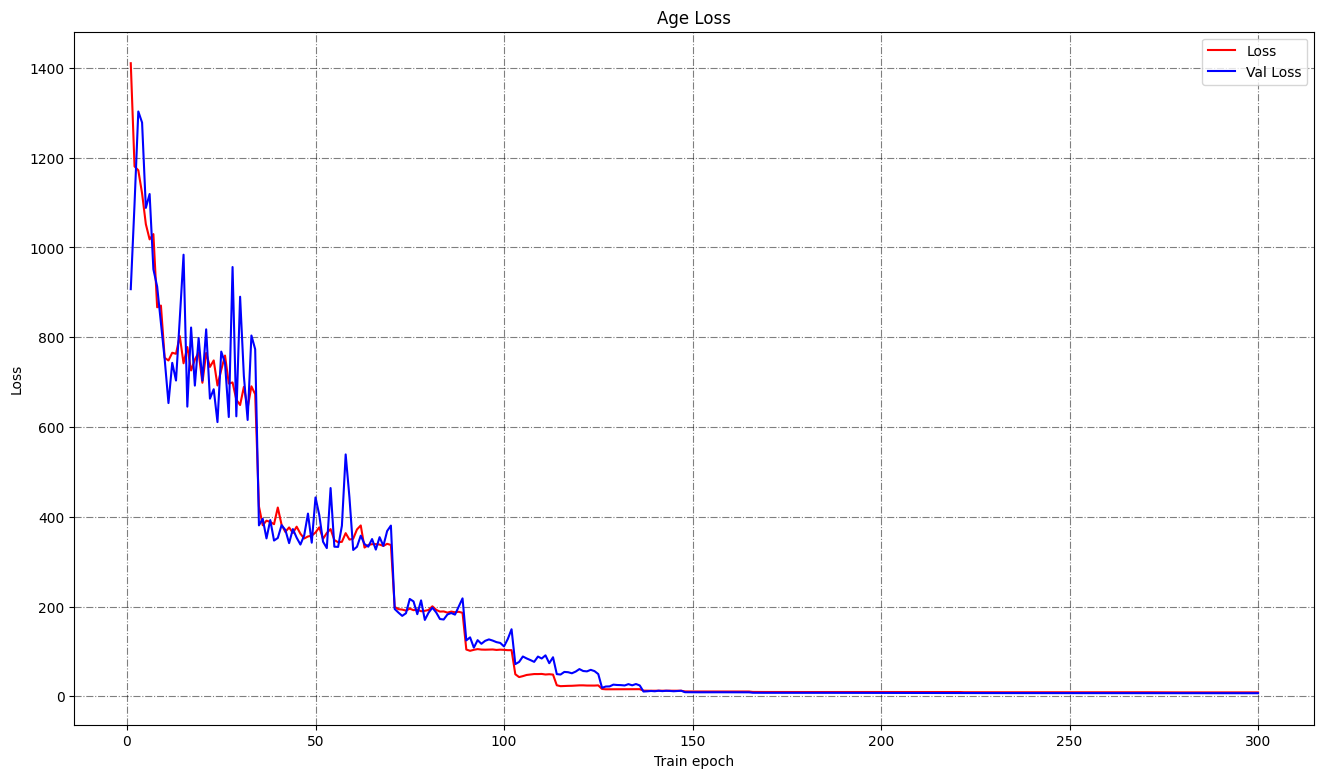

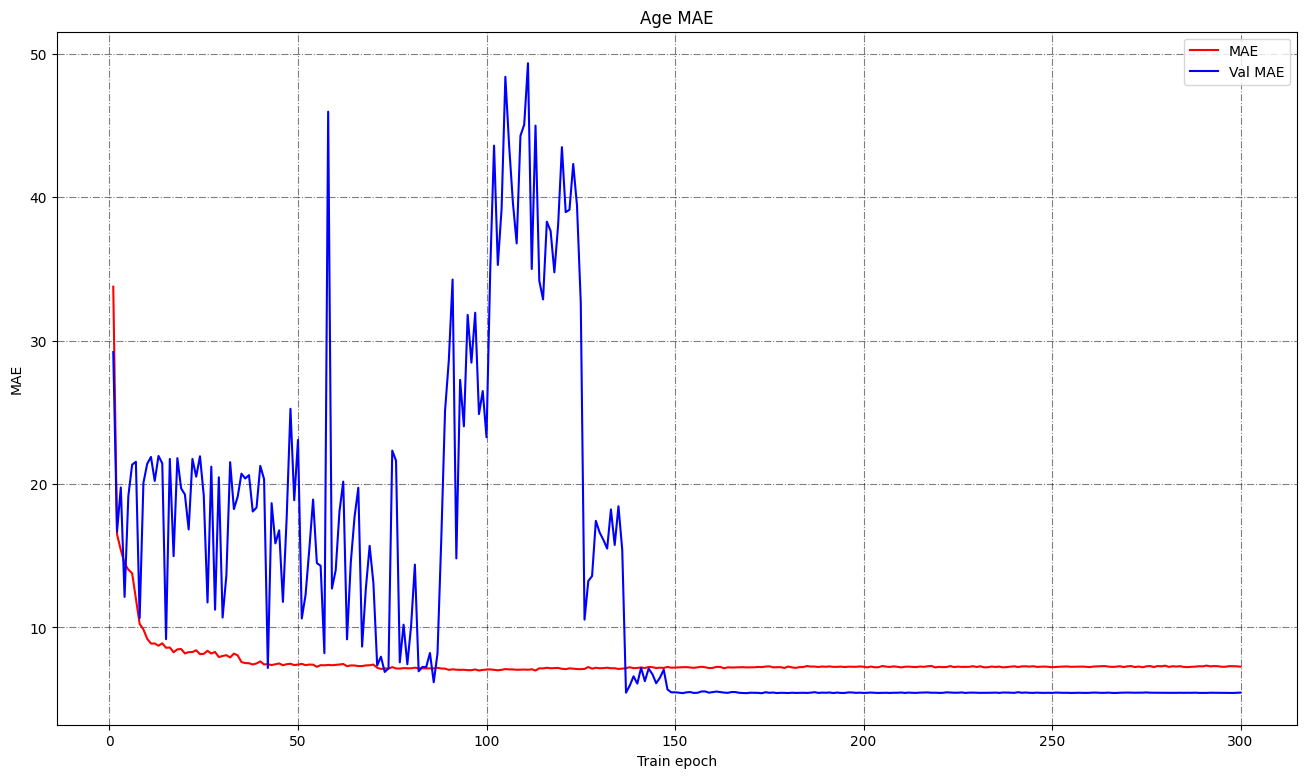

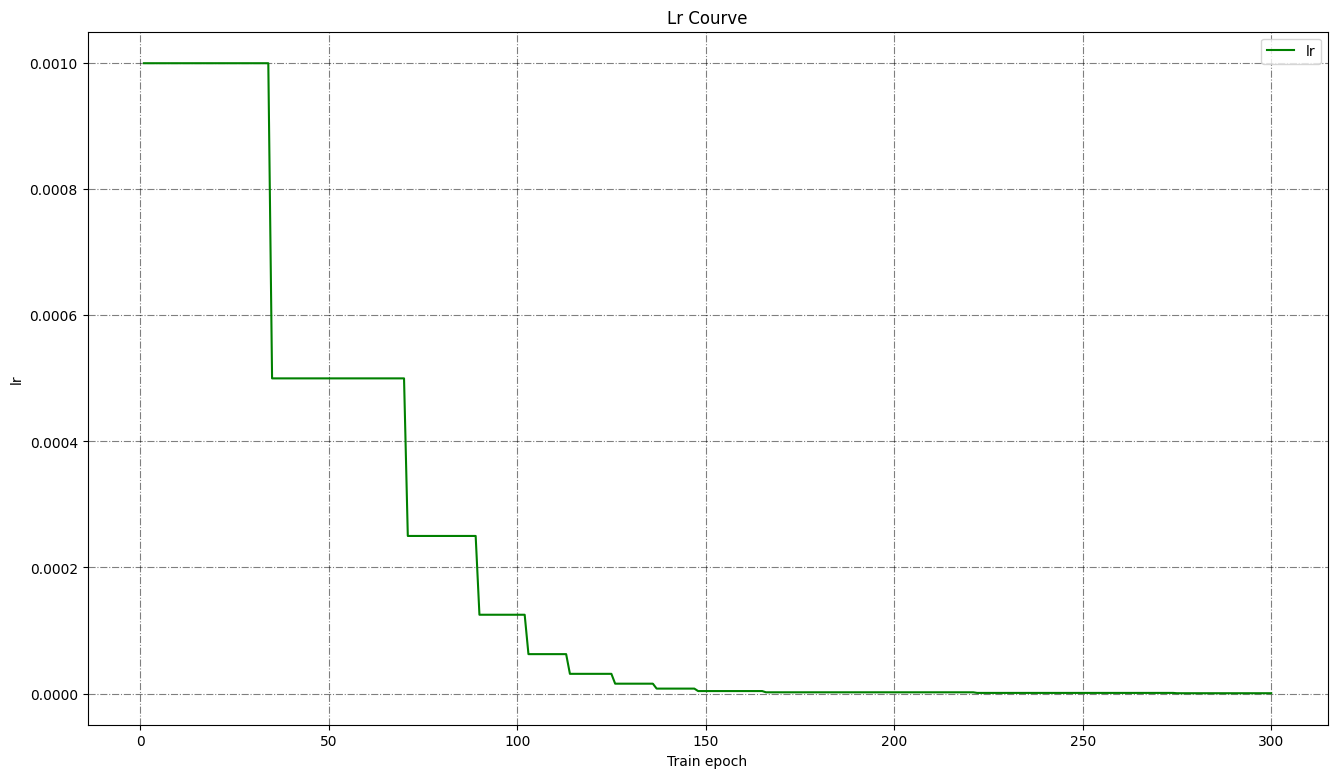

In [34]:
#绘制模型训练曲线图
Run_data=DataFrame(Age_NN_history.history)
fig_loss=plt.figure(figsize=(16,9))    #损失函数曲线
ax_loss=fig_loss.add_subplot(111)  
ax_loss.set_title('Age Loss')
ax_loss.grid(color='black',linestyle='-.',alpha=0.5)
ax_loss.plot(np.arange(1,Run_data.shape[0]+1),Run_data.loc[:,'loss'],color='red',linestyle='-',label='Loss')
ax_loss.plot(np.arange(1,Run_data.shape[0]+1),Run_data.loc[:,'val_loss'],color='blue',linestyle='-',label='Val Loss')
ax_loss.set_xlabel('Train epoch')
ax_loss.set_ylabel('Loss')
plt.legend()
fig_mae=plt.figure(figsize=(16,9))    #误差曲线
ax_mae=fig_mae.add_subplot(111)
ax_mae.set_title('Age MAE')
ax_mae.grid(color='black',linestyle='-.',alpha=0.5)
ax_mae.plot(np.arange(1,Run_data.shape[0]+1),Run_data.loc[:,'MAE'],color='red',linestyle='-',label='MAE')
ax_mae.plot(np.arange(1,Run_data.shape[0]+1),Run_data.loc[:,'val_MAE'],color='blue',linestyle='-',label='Val MAE')
ax_mae.set_xlabel('Train epoch')
ax_mae.set_ylabel('MAE')
plt.legend()
plt.show()
fig_lr=plt.figure(figsize=(16,9))    #学习率曲线
ax_lr=fig_lr.add_subplot(111)
ax_lr.set_title('Lr Courve')
ax_lr.grid(color='black',linestyle='-.',alpha=0.5)
ax_lr.plot(np.arange(1,Run_data.shape[0]+1),Run_data.loc[:,'lr'],color='green',linestyle='-',label='lr')
ax_lr.set_xlabel('Train epoch')
ax_lr.set_ylabel('lr')
plt.legend()
plt.show()

In [35]:
#模型测试
Age_NN.evaluate(Age_TestData)

165/165 [==============================] - 2s 12ms/step - loss: 6.8587 - MAE: 5.4531


[6.858731746673584, 5.453146934509277]

In [36]:
#保存模型
Age_NN.save('Age_NN_Net.h5')

绘制模型预测结果回归图并计算R2值

157/157 [==============================] - 2s 4ms/step
模型:XGBoost_PredictR2值为:0.9998053439432679


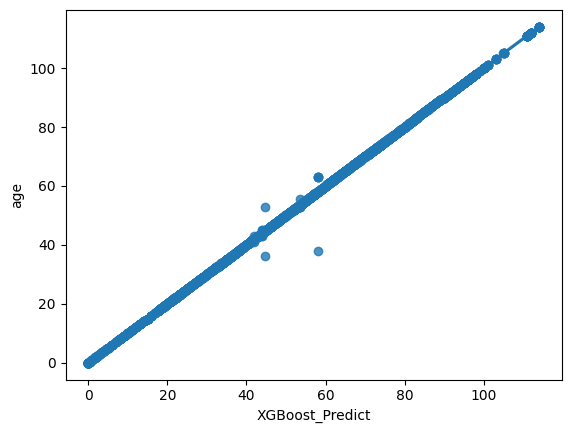

模型:LightGBM_PredictR2值为:0.9827719354448892


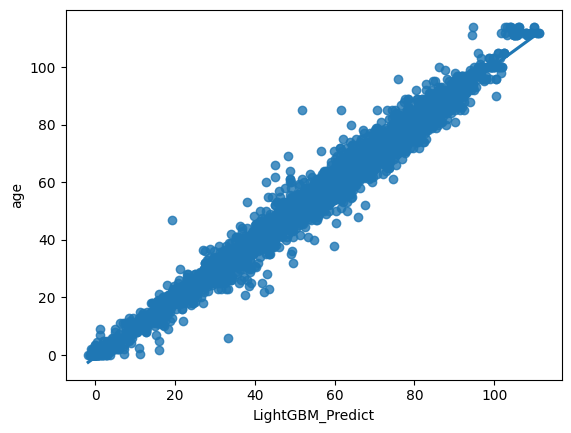

模型:CatBoost_PredictR2值为:0.9984338050932292


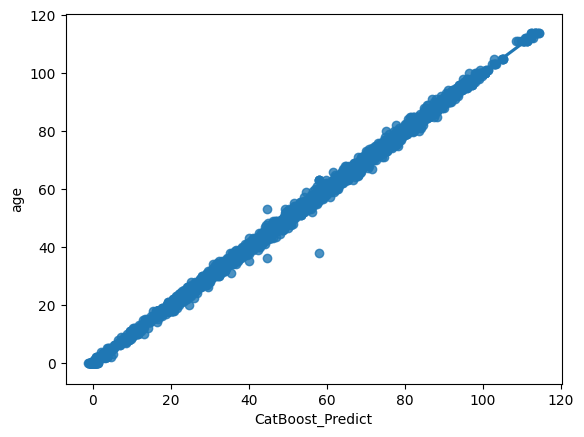

模型:DNN_PredictR2值为:0.9117177063350174


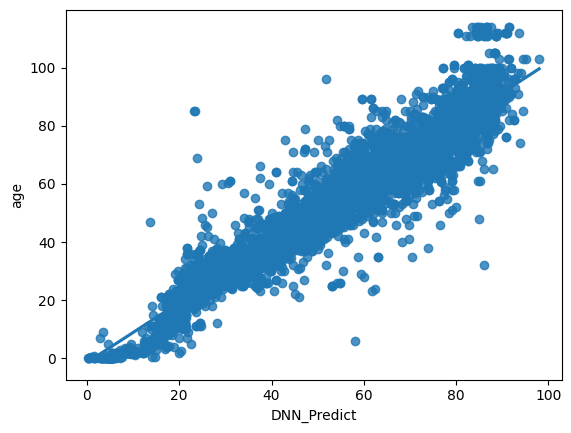

In [37]:
#模型结果预测-训练集
from sklearn.metrics import r2_score
True_Predict_Data=DataFrame(Age_train)    #载入真实生物学数据
True_Predict_Data['XGBoost_Predict']=Model_XGB.predict(Age_feature_train)    #载入XGBoost预测数据
True_Predict_Data['LightGBM_Predict']=Model_LGB.predict(Age_feature_train)    #载入LightGBM预测数据
True_Predict_Data['CatBoost_Predict']=Model_Cat.predict(Age_feature_train)    #载入CatBoost预测数据
True_Predict_Data['DNN_Predict']=Age_NN.predict(Age_feature_train)    #载入DNN预测数据
PredictData_Model=['XGBoost_Predict','LightGBM_Predict','CatBoost_Predict','DNN_Predict']
for Xdata_Str in PredictData_Model:    #绘制训练数据回归图
    R2_score=r2_score(True_Predict_Data.loc[:,'age'],True_Predict_Data.loc[:,Xdata_Str])
    print('模型:{0}R2值为:{1}'.format(Xdata_Str,R2_score))
    fig_r2=plt.figure()
    ax_r2=fig_r2.add_subplot()
    sns.regplot(x=Xdata_Str,y='age',data=True_Predict_Data)
    plt.show()

模型:XGBoost_Predict残差为:1.0465230936418379e-07


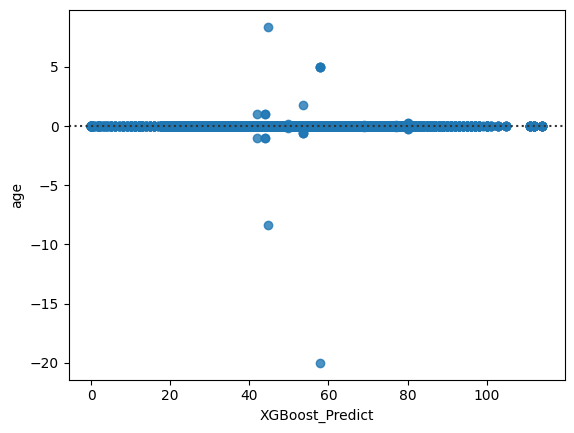

模型:LightGBM_Predict残差为:0.0024088474032999984


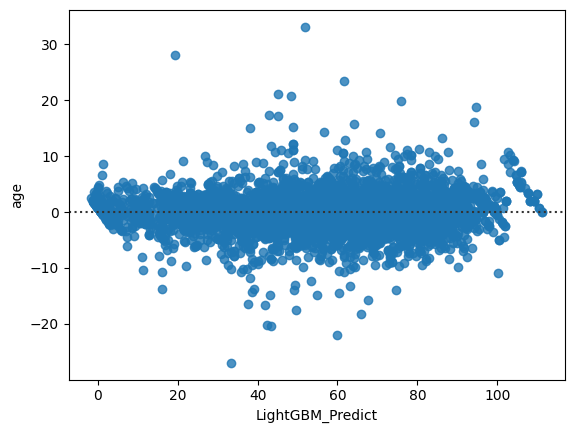

模型:CatBoost_Predict残差为:0.00010708868445020414


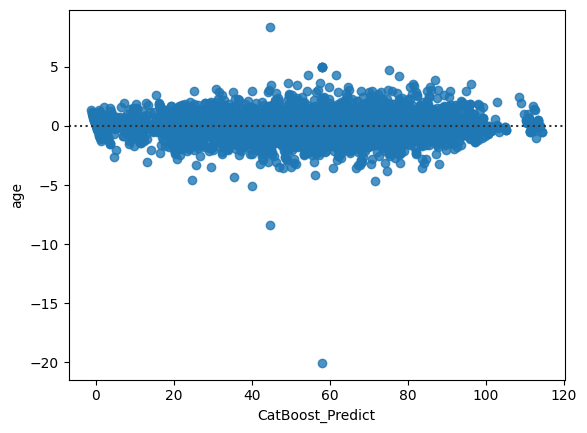

模型:DNN_Predict残差为:0.2167261201518982


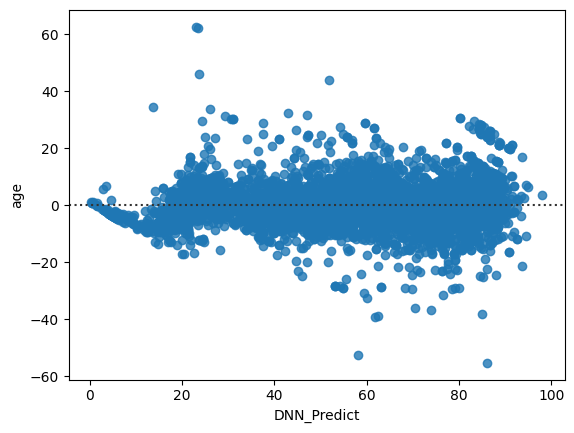

In [38]:
#绘制训练数据集残差图
import numpy as np
for Xdata_Str in PredictData_Model: 
    Resid_score=np.mean(True_Predict_Data.loc[:,'age']-True_Predict_Data.loc[:,Xdata_Str])
    print('模型:{0}残差为:{1}'.format(Xdata_Str,Resid_score))
    fig_resid=plt.figure()
    ax_resid=fig_resid.add_subplot()
    sns.residplot(x=Xdata_Str,y='age',data=True_Predict_Data)
    plt.show()

52/52 [==============================] - 0s 4ms/step
模型:XGBoost_PredictR2值为:0.9238846922536937


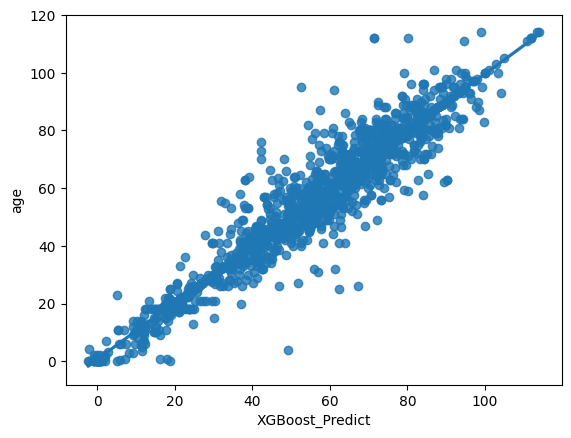

模型:LightGBM_PredictR2值为:0.9337078122417471


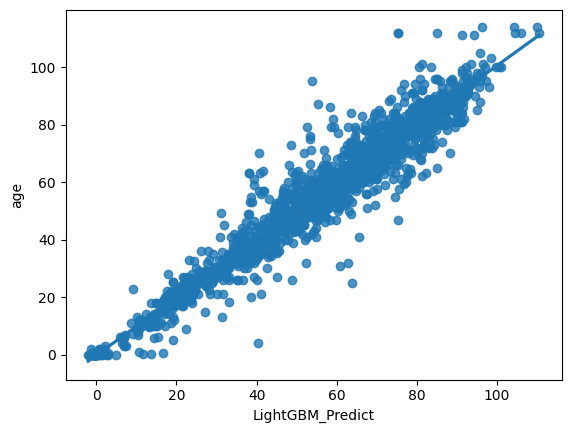

模型:CatBoost_PredictR2值为:0.9212810861998961


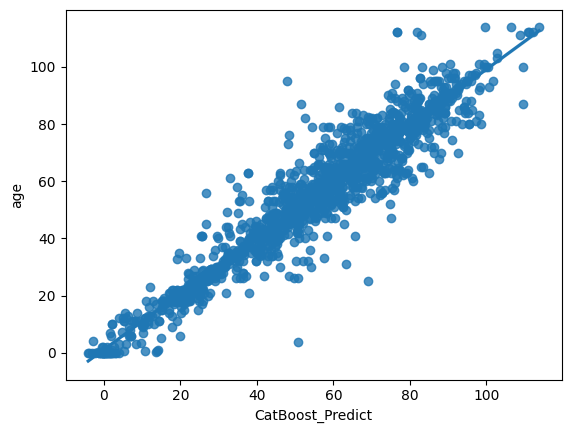

模型:DNN_PredictR2值为:0.912454833797037


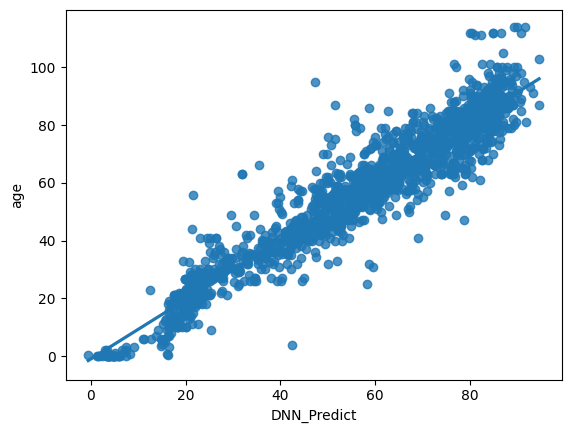

In [39]:
#模型结果预测-测试集
from sklearn.metrics import r2_score
True_Predict_Data_test=DataFrame(Age_test)    #载入真实生物学数据
True_Predict_Data_test['XGBoost_Predict']=Model_XGB.predict(Age_feature_test)    #载入XGBoost预测数据
True_Predict_Data_test['LightGBM_Predict']=Model_LGB.predict(Age_feature_test)    #载入LightGBM预测数据
True_Predict_Data_test['CatBoost_Predict']=Model_Cat.predict(Age_feature_test)    #载入CatBoost预测数据
True_Predict_Data_test['DNN_Predict']=Age_NN.predict(Age_feature_test)    #载入DNN预测数据
PredictData_Model_test=['XGBoost_Predict','LightGBM_Predict','CatBoost_Predict','DNN_Predict']
for Xdata_Str_test in PredictData_Model_test:    #绘制测试数据集回归图
    R2_score_test=r2_score(True_Predict_Data_test.loc[:,'age'],True_Predict_Data_test.loc[:,Xdata_Str_test])
    print('模型:{0}R2值为:{1}'.format(Xdata_Str_test,R2_score_test))
    fig_r2_test=plt.figure()
    ax_r2_test=fig_r2.add_subplot()
    sns.regplot(x=Xdata_Str_test,y='age',data=True_Predict_Data_test)
    plt.show()

模型:XGBoost_Predict残差为:0.07682348761476274


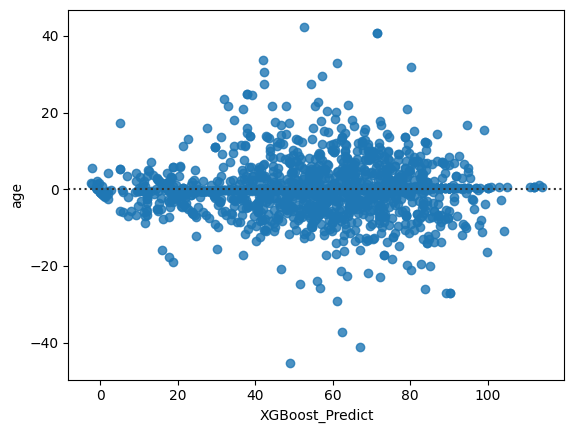

模型:LightGBM_Predict残差为:0.1687456019289071


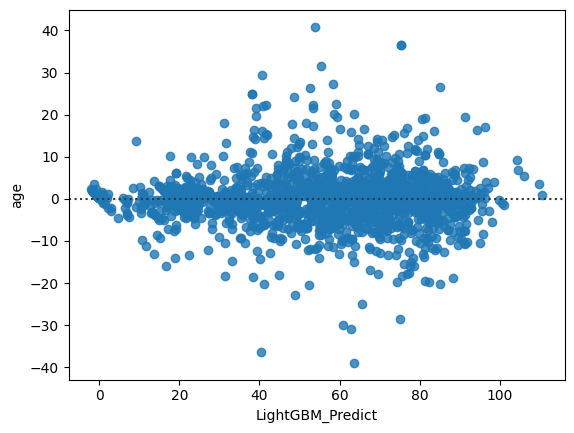

模型:CatBoost_Predict残差为:0.03527837339897981


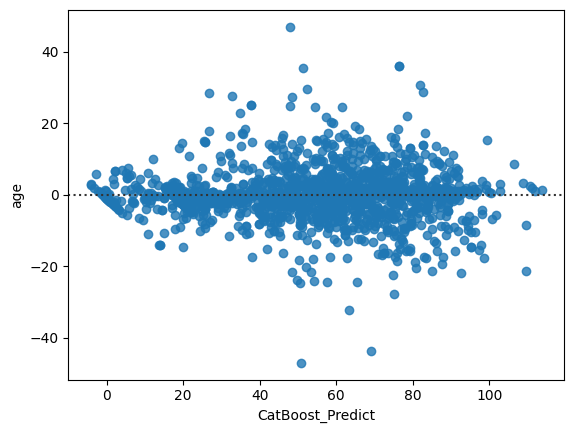

模型:DNN_Predict残差为:0.3777306550683193


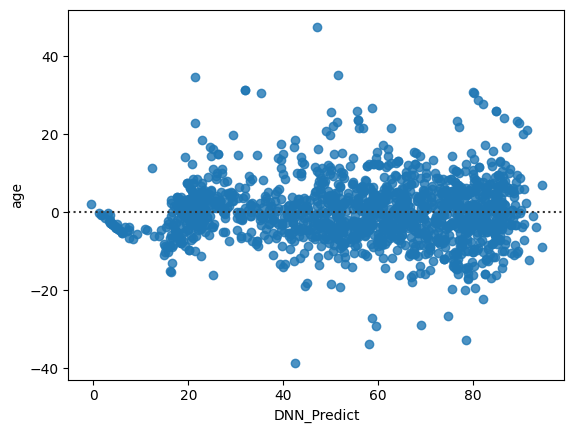

In [40]:
for Xdata_Str_test in PredictData_Model_test:    #绘制测试数据集残差图
    Resid_score_test=np.mean(True_Predict_Data_test.loc[:,'age']-True_Predict_Data_test.loc[:,Xdata_Str_test])
    print('模型:{0}残差为:{1}'.format(Xdata_Str_test,Resid_score_test))
    fig_resid_test=plt.figure()
    ax_resid_test=fig_resid_test.add_subplot()
    sns.residplot(x=Xdata_Str_test,y='age',data=True_Predict_Data_test)
    plt.show()

该部分用于构建同时实现生物学年龄预测和疾病预测的神经网络模型

In [41]:
#数据集切分
Feature_Data=feature_data.iloc[:,1:-5]    #输入特征
Target_Data=feature_data.loc[:,['age','disease_encode']]    #输入标签
#分配训练、验证集和测试集
from sklearn.model_selection import train_test_split
Data_train,X_test,Target_train,y_test=train_test_split(Feature_Data,Target_Data,train_size=0.8,random_state=123)    #X表示数据输入特征，y表示数据标签，即生物学年龄
X_train=Data_train[:5000]    #划分训练数据和转化格式
y_train=Target_train[:5000]
X_valid=Data_train[5000:]    #划分验证数据并转化格式
y_valid=Target_train[5000:]
print('训练集数据规模为:{0},验证集数据规模为:{1},测试集数据规模为:{2}'.format(X_train.shape,X_valid.shape,X_test.shape))
print('训练集标签规模为:{0},验证集标签规模为:{1},测试集标签规模为:{2}'.format(y_train.shape,y_valid.shape,y_test.shape))

训练集数据规模为:(5000, 39),验证集数据规模为:(1586, 39),测试集数据规模为:(1647, 39)
训练集标签规模为:(5000, 2),验证集标签规模为:(1586, 2),测试集标签规模为:(1647, 2)


In [42]:
#标签切分
age_train=y_train.loc[:,'age']
disease_train=y_train.loc[:,'disease_encode']
age_valid=y_valid.loc[:,'age']
disease_valid=y_valid.loc[:,'disease_encode']
age_test=y_test.loc[:,'age']
disease_test=y_test.loc[:,'disease_encode']

In [43]:
#模型组网
from tensorflow import keras
Input=keras.layers.Input(shape=[39])
Dense_layer=keras.layers.Dense(39,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Input)
Dense_layer=keras.layers.BatchNormalization()(Dense_layer)
Dense_layer=keras.layers.Dropout(rate=0.5)(Dense_layer)
Dense_layer=keras.layers.Dense(500,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Dense_layer)
Dense_layer=keras.layers.BatchNormalization()(Dense_layer)
Dense_layer=keras.layers.Dropout(rate=0.5)(Dense_layer)
Dense_layer=keras.layers.Dense(1000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Dense_layer)
Dense_layer=keras.layers.BatchNormalization()(Dense_layer)
Dense_layer=keras.layers.Dropout(rate=0.5)(Dense_layer)
for i in range(10):
    Dense_layer=keras.layers.Dense(3000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Dense_layer)
    Dense_layer=keras.layers.Dense(3000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Dense_layer)
    Dense_layer=keras.layers.BatchNormalization()(Dense_layer)
    Dense_layer=keras.layers.Dropout(rate=0.5)(Dense_layer)
Dense_layer=keras.layers.Dense(1000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Dense_layer)
Dense_layer=keras.layers.Dense(1000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Dense_layer)
Regression_layer=keras.layers.Dense(1000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Dense_layer)   
Regression_layer=keras.layers.Dense(1000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Regression_layer)
Regression_layer=keras.layers.BatchNormalization()(Regression_layer)
Regression_layer=keras.layers.Dropout(rate=0.5)(Regression_layer)
for i in range(5):
    Regression_layer=keras.layers.Dense(1000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Regression_layer)
    Regression_layer=keras.layers.Dense(1000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Regression_layer)
    Regression_layer=keras.layers.BatchNormalization()(Regression_layer)
    Regression_layer=keras.layers.Dropout(rate=0.5)(Regression_layer)
Regression_layer=keras.layers.Dense(500,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Regression_layer)    
Regression_layer=keras.layers.Dense(250,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Regression_layer)
Regression_layer=keras.layers.BatchNormalization()(Regression_layer)
Regression_layer=keras.layers.Dropout(rate=0.5)(Regression_layer)
Regression_layer=keras.layers.Dense(100,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Regression_layer)    
Regression_layer=keras.layers.Dense(25,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Regression_layer)
Regression_out=keras.layers.Dense(1,name='Age_Out')(Regression_layer)    #生物学年龄输出层
Class_layer=keras.layers.Dense(500,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Dense_layer)    #分类模块
for i in range(5):
    Class_layer=keras.layers.Dense(1000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Class_layer)
    Class_layer=keras.layers.Dense(1000,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Class_layer)
    Class_layer=keras.layers.BatchNormalization()(Class_layer)
    Class_layer=keras.layers.Dropout(rate=0.5)(Class_layer)
Class_layer=keras.layers.Dense(500,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Class_layer)    
Class_layer=keras.layers.Dense(250,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Class_layer)
Class_layer=keras.layers.BatchNormalization()(Class_layer)
Class_layer=keras.layers.Dropout(rate=0.5)(Class_layer)
Class_layer=keras.layers.Dense(100,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Class_layer)    
Class_layer=keras.layers.Dense(50,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Class_layer)
Class_layer=keras.layers.BatchNormalization()(Class_layer)
Class_layer=keras.layers.Dropout(rate=0.5)(Class_layer)
Class_layer=keras.layers.Dense(25,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Class_layer)    
Class_layer=keras.layers.Dense(15,activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Class_layer)
Class_out=keras.layers.Dense(10,activation='softmax',name='Disease_out')(Class_layer)    #疾病输出层
Class_Reg_DNN=keras.Model(inputs=[Input],outputs=[Regression_out,Class_out])    #模型组网
Class_Reg_DNN.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 39)]         0           []                               
                                                                                                  
 dense_21 (Dense)               (None, 39)           1560        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_18 (BatchN  (None, 39)          156         ['dense_21[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 dropout_18 (Dropout)           (None, 39)           0           ['batch_normalization_18[0][0

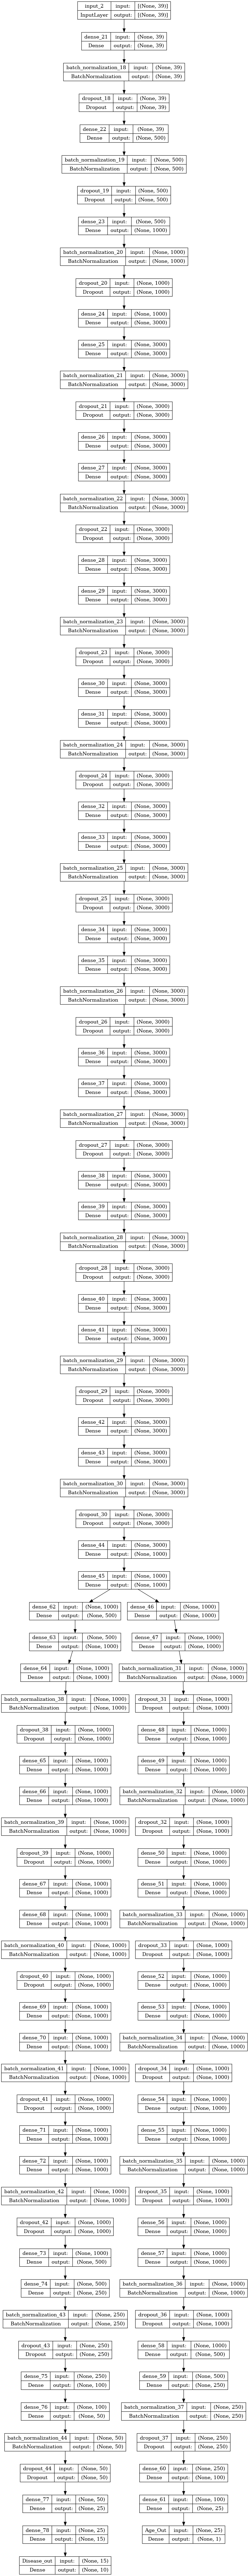

In [44]:
from keras.utils import plot_model
plot_model(Class_Reg_DNN,show_shapes=True)

In [45]:
#模型编译及训练
train_epochs=1000
lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=10)    #学习率性能调度
CheckPoint_model=keras.callbacks.ModelCheckpoint('CNN_Net',save_best_only=True)    #设置提前停止
EarlyStopping_model=keras.callbacks.EarlyStopping(patience=500,restore_best_weights=True)
Class_Reg_DNN.compile(loss={'Age_Out':'MAE','Disease_out':'sparse_categorical_crossentropy'},
                optimizer=keras.optimizers.Nadam(learning_rate=0.001),
                metrics={'Age_Out':'MAE','Disease_out':'Accuracy'})
Class_Reg_DNN_history=Class_Reg_DNN.fit(x=X_train,y=[age_train,disease_train],batch_size=100,epochs=train_epochs,
                            validation_data=([X_valid],[age_valid,disease_valid]),verbose=1,callbacks=[lr_scheduler,CheckPoint_model,EarlyStopping_model])

Epoch 1/1000
50/50 [==============================] - 95s 828ms/step - loss: 18188.8633 - Age_Out_loss: 42.4458 - Disease_out_loss: 2.4275 - Age_Out_MAE: 42.4458 - Disease_out_Accuracy: 0.1800 - val_loss: 5462.7856 - val_Age_Out_loss: 48.3134 - val_Disease_out_loss: 1.8071 - val_Age_Out_MAE: 48.3134 - val_Disease_out_Accuracy: 0.7623 - lr: 0.0010
Epoch 2/1000
50/50 [==============================] - 38s 772ms/step - loss: 3167.2295 - Age_Out_loss: 23.2130 - Disease_out_loss: 1.3024 - Age_Out_MAE: 23.2130 - Disease_out_Accuracy: 0.7068 - val_loss: 2240.9775 - val_Age_Out_loss: 47.3222 - val_Disease_out_loss: 1.3602 - val_Age_Out_MAE: 47.3222 - val_Disease_out_Accuracy: 0.7623 - lr: 0.0010
Epoch 3/1000
50/50 [==============================] - 37s 761ms/step - loss: 1983.4940 - Age_Out_loss: 23.7669 - Disease_out_loss: 1.1521 - Age_Out_MAE: 23.7669 - Disease_out_Accuracy: 0.7508 - val_loss: 1422.4843 - val_Age_Out_loss: 48.0630 - val_Disease_out_loss: 1.1903 - val_Age_Out_MAE: 48.0630 - v

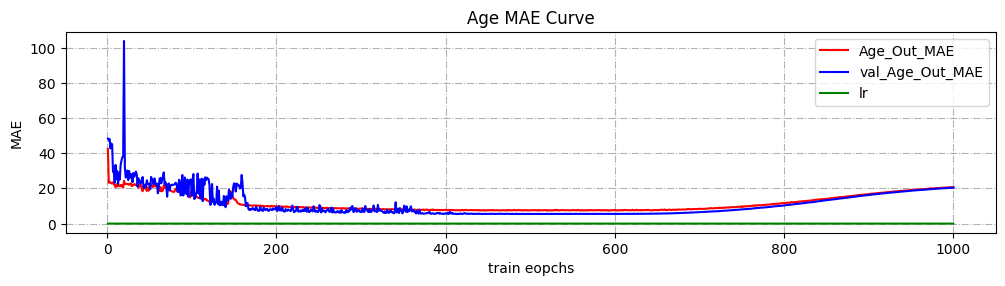

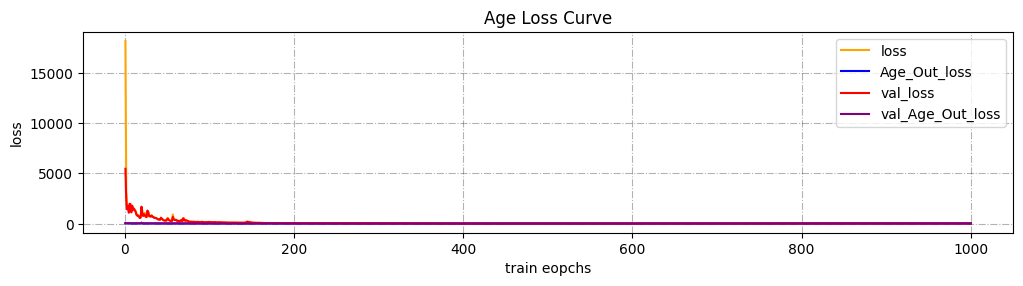

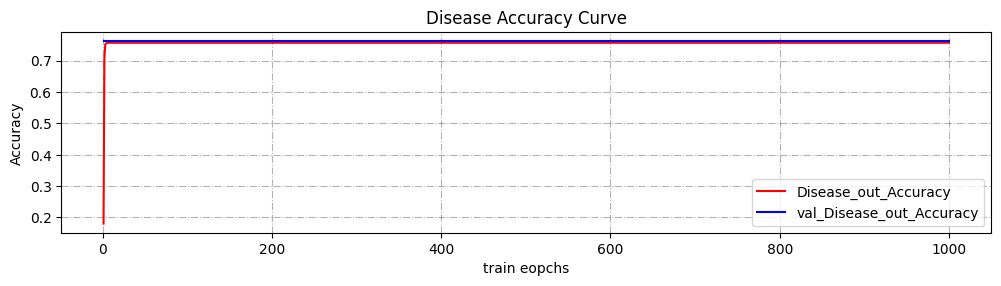

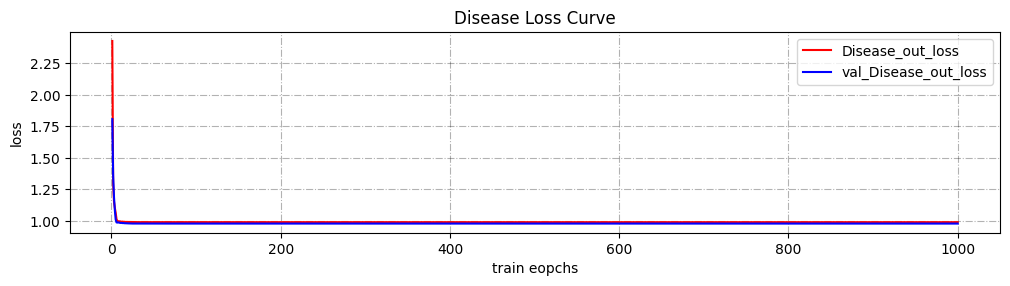

In [46]:
#绘制训练参数图
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
Class_Reg_DNN_history=DataFrame(Class_Reg_DNN_history.history)
fig9=plt.figure(figsize=(12,12))    #生物学年龄MAE
ax91=fig9.add_subplot(411)
ax91.set_title('Age MAE Curve')
plt.grid(color='black',linestyle='-.',alpha=0.3)
ax91.plot(np.arange(1,Class_Reg_DNN_history.shape[0]+1),Class_Reg_DNN_history.loc[:,'Age_Out_MAE'],color='red',label='Age_Out_MAE')
ax91.plot(np.arange(1,Class_Reg_DNN_history.shape[0]+1),Class_Reg_DNN_history.loc[:,'val_Age_Out_MAE'],color='blue',label='val_Age_Out_MAE')
ax91.plot(np.arange(1,Class_Reg_DNN_history.shape[0]+1),Class_Reg_DNN_history.loc[:,'lr'],color='green',label='lr')
ax91.set_xlabel('train eopchs')
ax91.set_ylabel('MAE')
plt.legend()
plt.show()
fig10=plt.figure(figsize=(12,12))    #生物学年龄Loss
ax10=fig10.add_subplot(412)
ax10.set_title('Age Loss Curve')
plt.grid(color='black',linestyle='-.',alpha=0.3)
ax10.plot(np.arange(1,Class_Reg_DNN_history.shape[0]+1),Class_Reg_DNN_history.loc[:,'loss'],color='orange',label='loss')
ax10.plot(np.arange(1,Class_Reg_DNN_history.shape[0]+1),Class_Reg_DNN_history.loc[:,'Age_Out_loss'],color='blue',label='Age_Out_loss')
ax10.plot(np.arange(1,Class_Reg_DNN_history.shape[0]+1),Class_Reg_DNN_history.loc[:,'val_loss'],color='red',label='val_loss')
ax10.plot(np.arange(1,Class_Reg_DNN_history.shape[0]+1),Class_Reg_DNN_history.loc[:,'val_Age_Out_loss'],color='purple',label='val_Age_Out_loss')
ax10.set_xlabel('train eopchs')
ax10.set_ylabel('loss')
plt.legend()
plt.show()
fig11=plt.figure(figsize=(12,12))    #疾病分类Accuracy
ax11=fig11.add_subplot(413)
ax11.set_title('Disease Accuracy Curve')
plt.grid(color='black',linestyle='-.',alpha=0.3)
ax11.plot(np.arange(1,Class_Reg_DNN_history.shape[0]+1),Class_Reg_DNN_history.loc[:,'Disease_out_Accuracy'],color='red',label='Disease_out_Accuracy')
ax11.plot(np.arange(1,Class_Reg_DNN_history.shape[0]+1),Class_Reg_DNN_history.loc[:,'val_Disease_out_Accuracy'],color='blue',label='val_Disease_out_Accuracy')
ax11.set_xlabel('train eopchs')
ax11.set_ylabel('Accuracy')
plt.legend()
plt.show()
fig12=plt.figure(figsize=(12,12))    #疾病分类Loss
ax12=fig12.add_subplot(414)
ax12.set_title('Disease Loss Curve')
plt.grid(color='black',linestyle='-.',alpha=0.3)
ax12.plot(np.arange(1,Class_Reg_DNN_history.shape[0]+1),Class_Reg_DNN_history.loc[:,'Disease_out_loss'],color='red',label='Disease_out_loss')
ax12.plot(np.arange(1,Class_Reg_DNN_history.shape[0]+1),Class_Reg_DNN_history.loc[:,'val_Disease_out_loss'],color='blue',label='val_Disease_out_loss')
ax12.set_xlabel('train eopchs')
ax12.set_ylabel('loss')
plt.legend()
plt.show()

In [47]:
Class_Reg_DNN.evaluate([X_test],[age_test,disease_test])    #评估模型结果

52/52 [==============================] - 1s 16ms/step - loss: 24.2962 - Age_Out_loss: 20.5996 - Disease_out_loss: 0.9571 - Age_Out_MAE: 20.5996 - Disease_out_Accuracy: 0.7735


[24.296165466308594,
 20.599563598632812,
 0.9571383595466614,
 20.599563598632812,
 0.7735276222229004]

In [48]:
#保存模型
Class_Reg_DNN.save('Class_Reg_DNN.h5')
Class_Reg_DNN.save('Class_Reg_DNN')